<a href="https://colab.research.google.com/github/WeiSengChung/heart-disease-prediction/blob/main/heart-disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from scipy import stats
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
df = pd.read_csv('HeartAssign2.csv')
df.head()
# Assumptions of the columns are as follows:
# age (float) - Patient's age.
# sex (int) - 1 = Male, 0 = Female (categorical).
# cp (int) - Chest pain type (categorical).
# trestbps (int) - Resting blood pressure (mm Hg).
# chol (float) - Serum cholesterol (mg/dL).
# fbs (float) - Fasting blood sugar (>120 mg/dL: 1, else 0) (categorical).
# restecg (float) - Resting electrocardiographic results (categorical).
# thalach (float) - Maximum heart rate achieved.
# exang (int) - Exercise-induced angina (1 = Yes, 0 = No) (categorical).
# oldpeak (float) - ST depression induced by exercise.
# slope (int) - Slope of peak exercise ST segment (categorical).
# ca (int) - Number of major vessels colored by fluoroscopy (categorical).
# thal (int) - Thalassemia type (categorical).
# target (float) - Presence of heart disease (1 = Yes, 0 = No) (categorical).

FileNotFoundError: [Errno 2] No such file or directory: 'HeartAssign2.csv'

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##Missing Data/Values

In [ ]:
df.shape
#rows, columns

(1027, 14)

In [ ]:
df.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        1
fbs         1
restecg     1
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      2
dtype: int64

In [ ]:
#It appears that there are 2 rows where the Y data, target column (predicted or labeled column) has missing values
#We assume that it shall then be dropped because of three reasons:
#First reason: 2 out of 1027 rows is considered small (2 divided by 1027 = 0.002)
#Second reason: We cannot tell the model to learn without a label in the predicted column (y value)
#Third reason: We assume that it is missing due to MCAR (Missing completely at random)

df = df.dropna(subset=['target'])
df.shape

(1025, 14)

In [ ]:
#now that the rows with missing values in target column are dropped, the rows with missing values in other columns will be imputed later
df.isnull().sum()

age         2
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     1
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#to find the features(columns) where the data should be categorical but was inputted as float type instead of integer, and vice versa
def print_uniques(df):
  for col in df.columns[:14]:
    print(col + ": " + str(df[col].unique())+"\n")

print_uniques(df)

age: [52.0001 53.0002 70.0003 ... 50.1025 54.1026 65.1027]

sex: [1 0]

cp: [0 1 2 3]

trestbps: [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101 800]

chol: [212. 203. 174. 294. 248. 318. 289. 249. 286. 149. 341. 210. 298. 204.
 308. 266. 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 327.
 169. 131. 269. 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226.
 228. 278. 230. 283. 241. 175. 217. 193. 245. 232. 299. 288. 197. 315.
 215. 164. 326. 207. 177. 257. 255. 187. 201. 220. 268. 267. 236. 303.
 282. 126. 309. 186. 275. 281. 206. 335. 218. 254. 295. 417. 260. 240.
 302. 192. 225. 325. 235. 274. 234. 182. 167. 172. 321. 300. 199. 564.
 157. 304. 222. 184. 354. 160. 247. 239. 246. 409. 293. 180. 250. 221.
 200. 227. 243. 311. 261. 242. 205. 306. 219. 353. 198. 394. 183. 237.
 224. 265. 313. 340. 259. 270.  nan 216. 264. 276. 32

In [ ]:
#it appears that these categorical features: fbs and restecg were inputted as float instead of int
#we shall change them to int types
df['fbs'] = df['fbs'].astype('int64')
df['restecg'] = df['restecg'].astype('int64')

#we should also change the Y data into int type as it shall be a yes or no value
df['target'] = df['target'].astype('int64')

#this feature (trestbps) is a continuous feature type, so we can change it to float type
df['trestbps'] = df['trestbps'].astype('float64')
print_uniques(df)

age: [52.0001 53.0002 70.0003 ... 50.1025 54.1026 65.1027]

sex: [1 0]

cp: [0 1 2 3]

trestbps: [125. 140. 145. 148. 138. 100. 114. 160. 120. 122. 112. 132. 118. 128.
 124. 106. 104. 135. 130. 136. 180. 129. 150. 178. 146. 117. 152. 154.
 170. 134. 174. 144. 108. 123. 110. 142. 126. 192. 115.  94. 200. 165.
 102. 105. 155. 172. 164. 156. 101. 800.]

chol: [212. 203. 174. 294. 248. 318. 289. 249. 286. 149. 341. 210. 298. 204.
 308. 266. 244. 211. 185. 223. 208. 252. 209. 307. 233. 319. 256. 327.
 169. 131. 269. 196. 231. 213. 271. 263. 229. 360. 258. 330. 342. 226.
 228. 278. 230. 283. 241. 175. 217. 193. 245. 232. 299. 288. 197. 315.
 215. 164. 326. 207. 177. 257. 255. 187. 201. 220. 268. 267. 236. 303.
 282. 126. 309. 186. 275. 281. 206. 335. 218. 254. 295. 417. 260. 240.
 302. 192. 225. 325. 235. 274. 234. 182. 167. 172. 321. 300. 199. 564.
 157. 304. 222. 184. 354. 160. 247. 239. 246. 409. 293. 180. 250. 221.
 200. 227. 243. 311. 261. 242. 205. 306. 219. 353. 198. 394. 183. 237.
 2

In [ ]:
print(len(df[df['target']==0]))
print(len(df[df['target']==1]))

499
526


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1023 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   float64
 4   chol      1024 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1024 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1024 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 120.1 KB


In [ ]:
df.select_dtypes(include=['float64']).describe().T

count        mean        std    min        25%       50%       75%  \
age       1023.0   54.488049   9.072387   29.0   48.00285   56.0174   61.0554   
trestbps  1025.0  132.277073  27.258229   94.0  120.00000  130.0000  140.0000   
chol      1024.0  245.878906  51.554439  126.0  211.00000  240.0000  275.0000   
thalach   1024.0  149.741211  29.623714   71.0  132.00000  152.0000  166.0000   
oldpeak   1024.0    1.109961   1.782723    0.0    0.00000    0.8000    1.8000   

               max  
age        77.0385  
trestbps  800.0000  
chol      564.0000  
thalach   746.0000  
oldpeak    44.0000

In [ ]:
# Select categorical columns with int64 dtype
categorical_int64_cols = df.select_dtypes(include=['int64']).columns

# Iterate through the selected columns and describe them
for col in categorical_int64_cols:
    print(f"Column: {col}")
    print(df[col].describe())
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Frequency of Mode: {df[col].value_counts().iloc[0]}")
    print("-" * 20)


Column: sex
count    1025.000000
mean        0.692683
std         0.461607
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
Mode: 1
Frequency of Mode: 710
--------------------
Column: cp
count    1025.000000
mean        0.942439
std         1.031536
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: cp, dtype: float64
Mode: 0
Frequency of Mode: 498
--------------------
Column: fbs
count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64
Mode: 0
Frequency of Mode: 872
--------------------
Column: restecg
count    1025.000000
mean        0.531707
std         0.527764
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: restecg, dtype: float64
Mode: 1
Freque

In [ ]:
df.select_dtypes(include=['int64', 'category']).describe()

sex           cp          fbs      restecg        exang  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.692683     0.942439     0.149268     0.531707     0.336585   
std       0.461607     1.031536     0.356527     0.527764     0.472772   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     0.000000     1.000000     0.000000   
75%       1.000000     2.000000     0.000000     1.000000     1.000000   
max       1.000000     3.000000     1.000000     2.000000     1.000000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.387317     0.751220     2.320000     0.513171  
std       0.619692     1.026771     0.619539     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.105664 -0.068200  0.180500  0.222083  0.120867   
sex      -0.105664  1.000000 -0.047441 -0.087137 -0.198108  0.023851   
cp       -0.068200 -0.047441  1.000000  0.006055 -0.079212  0.079148   
trestbps  0.180500 -0.087137  0.006055  1.000000  0.103527  0.170387   
chol      0.222083 -0.198108 -0.079212  0.103527  1.000000  0.027884   
fbs       0.120867  0.023851  0.079148  0.170387  0.027884  1.000000   
restecg  -0.131212 -0.058173  0.049098 -0.099857 -0.147684 -0.105623   
thalach  -0.284765 -0.022048  0.258034 -0.033885 -0.022989 -0.014933   
exang     0.087751  0.138829 -0.400775  0.074219  0.067272  0.055054   
oldpeak   0.141316  0.020114 -0.135390  0.657643  0.061915  0.064224   
slope    -0.167008 -0.023881  0.132684 -0.128634 -0.012753 -0.067449   
ca        0.271448  0.110508 -0.179498  0.092208  0.074648  0.136221   
thal      0.069863  0.193958 -0.163688  0.064947  0.101838 -0.039614   
target   -0.227396 -0.276471  0.435948 -0.111027 -0.098217 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.131212 -0.284765  0.087751  0.141316 -0.167008  0.271448   
sex      -0.058173 -0.022048  0.138829  0.020114 -0.023881  0.110508   
cp        0.049098  0.258034 -0.400775 -0.135390  0.132684 -0.179498   
trestbps -0.099857 -0.033885  0.074219  0.657643 -0.128634  0.092208   
chol     -0.147684 -0.022989  0.067272  0.061915 -0.012753  0.074648   
fbs      -0.105623 -0.014933  0.055054  0.064224 -0.067449  0.136221   
restecg   1.000000  0.055439 -0.072168 -0.057676  0.086331 -0.078239   
thalach   0.055439  1.000000 -0.311337 -0.184162  0.296564 -0.116078   
exang    -0.072168 -0.311337  1.000000  0.237198 -0.272077  0.112315   
oldpeak  -0.057676 -0.184162  0.237198  1.000000 -0.430509  0.173056   
slope     0.086331  0.296564 -0.272077 -0.430509  1.000000 -0.074030   
ca       -0.078239 -0.116078  0.112315  0.173056 -0.074030  1.000000   
thal     -0.022102 -0.053409  0.202047  0.159283 -0.096760  0.148298   
target    0.138100  0.343507 -0.438029 -0.308690  0.341197 -0.374950   

              thal    target  
age       0.069863 -0.227396  
sex       0.193958 -0.276471  
cp       -0.163688  0.435948  
trestbps  0.064947 -0.111027  
chol      0.101838 -0.098217  
fbs      -0.039614 -0.041164  
restecg  -0.022102  0.138100  
thalach  -0.053409  0.343507  
exang     0.202047 -0.438029  
oldpeak   0.159283 -0.308690  
slope    -0.096760  0.341197  
ca        0.148298 -0.374950  
thal      1.000000 -0.335132  
target   -0.335132  1.000000

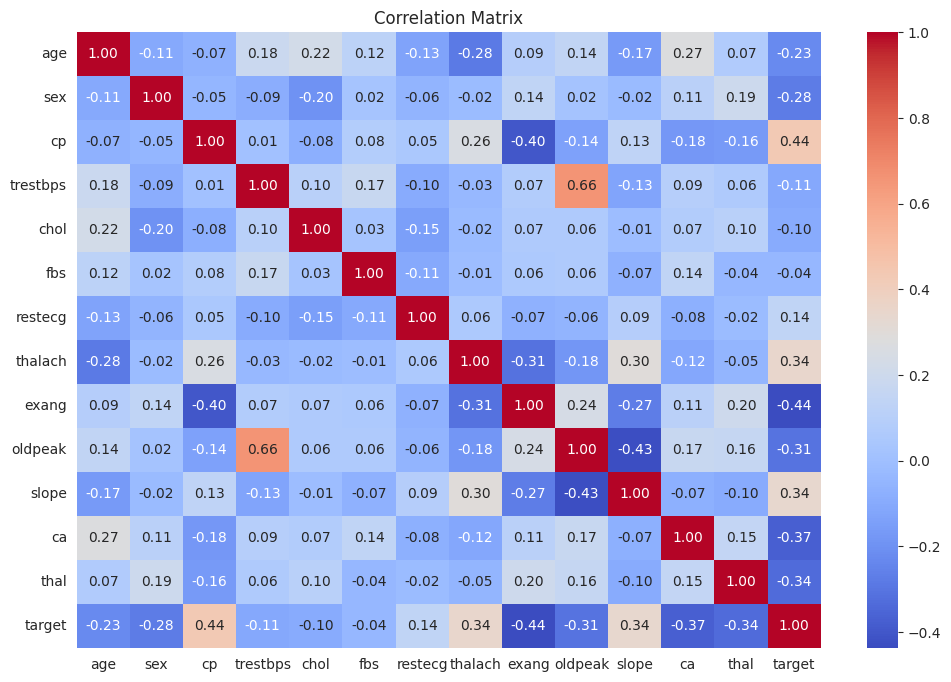

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##age

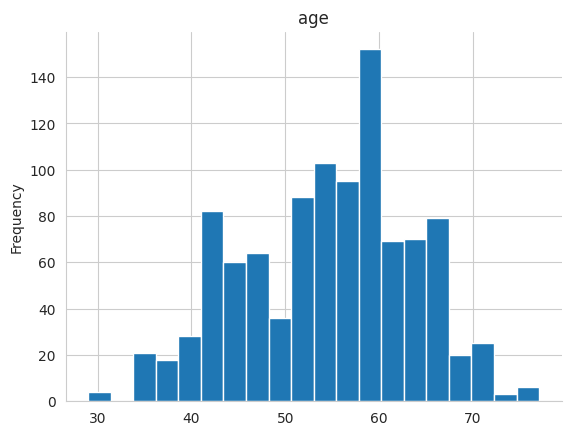

In [ ]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

##sex

In [ ]:
df['sex'].value_counts()

sex
1    710
0    315
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex count')

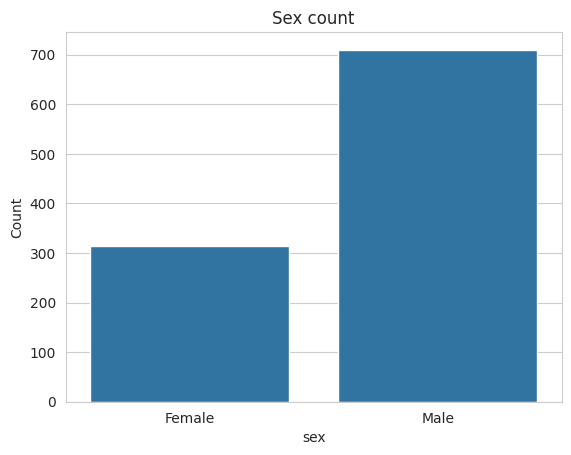

In [ ]:
sns.countplot(x=df['sex'])
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation=0)
plt.ylabel('Count')
plt.title("Sex count")

Text(0, 0.5, 'Count')

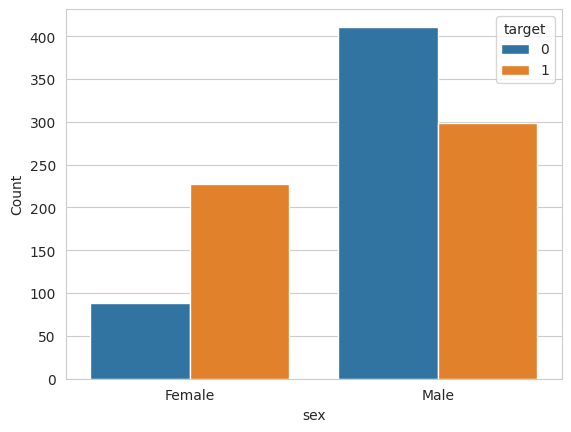

In [ ]:
sns.countplot(x=df['sex'], hue=df['target'])
plt.xticks(ticks=[0,1], labels=['Female', 'Male'], rotation=0)
plt.ylabel('Count')

##Graphs

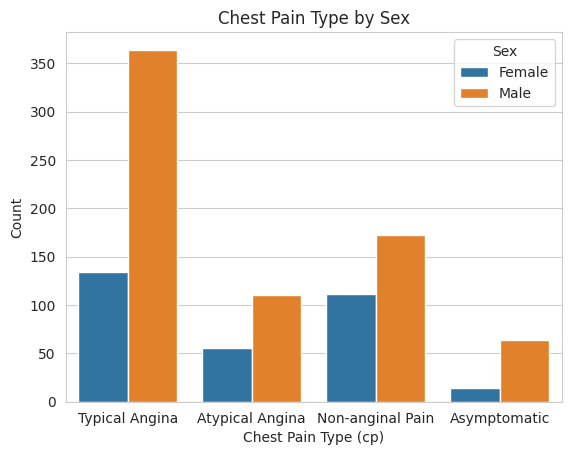

In [ ]:
sns.countplot(data= df, x='cp', hue="sex")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2,3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], rotation=0)
plt.title("Chest Pain Type by Sex")
plt.legend(title="Sex", labels=['Female','Male'])
plt.show()
# (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic) (Categorical)

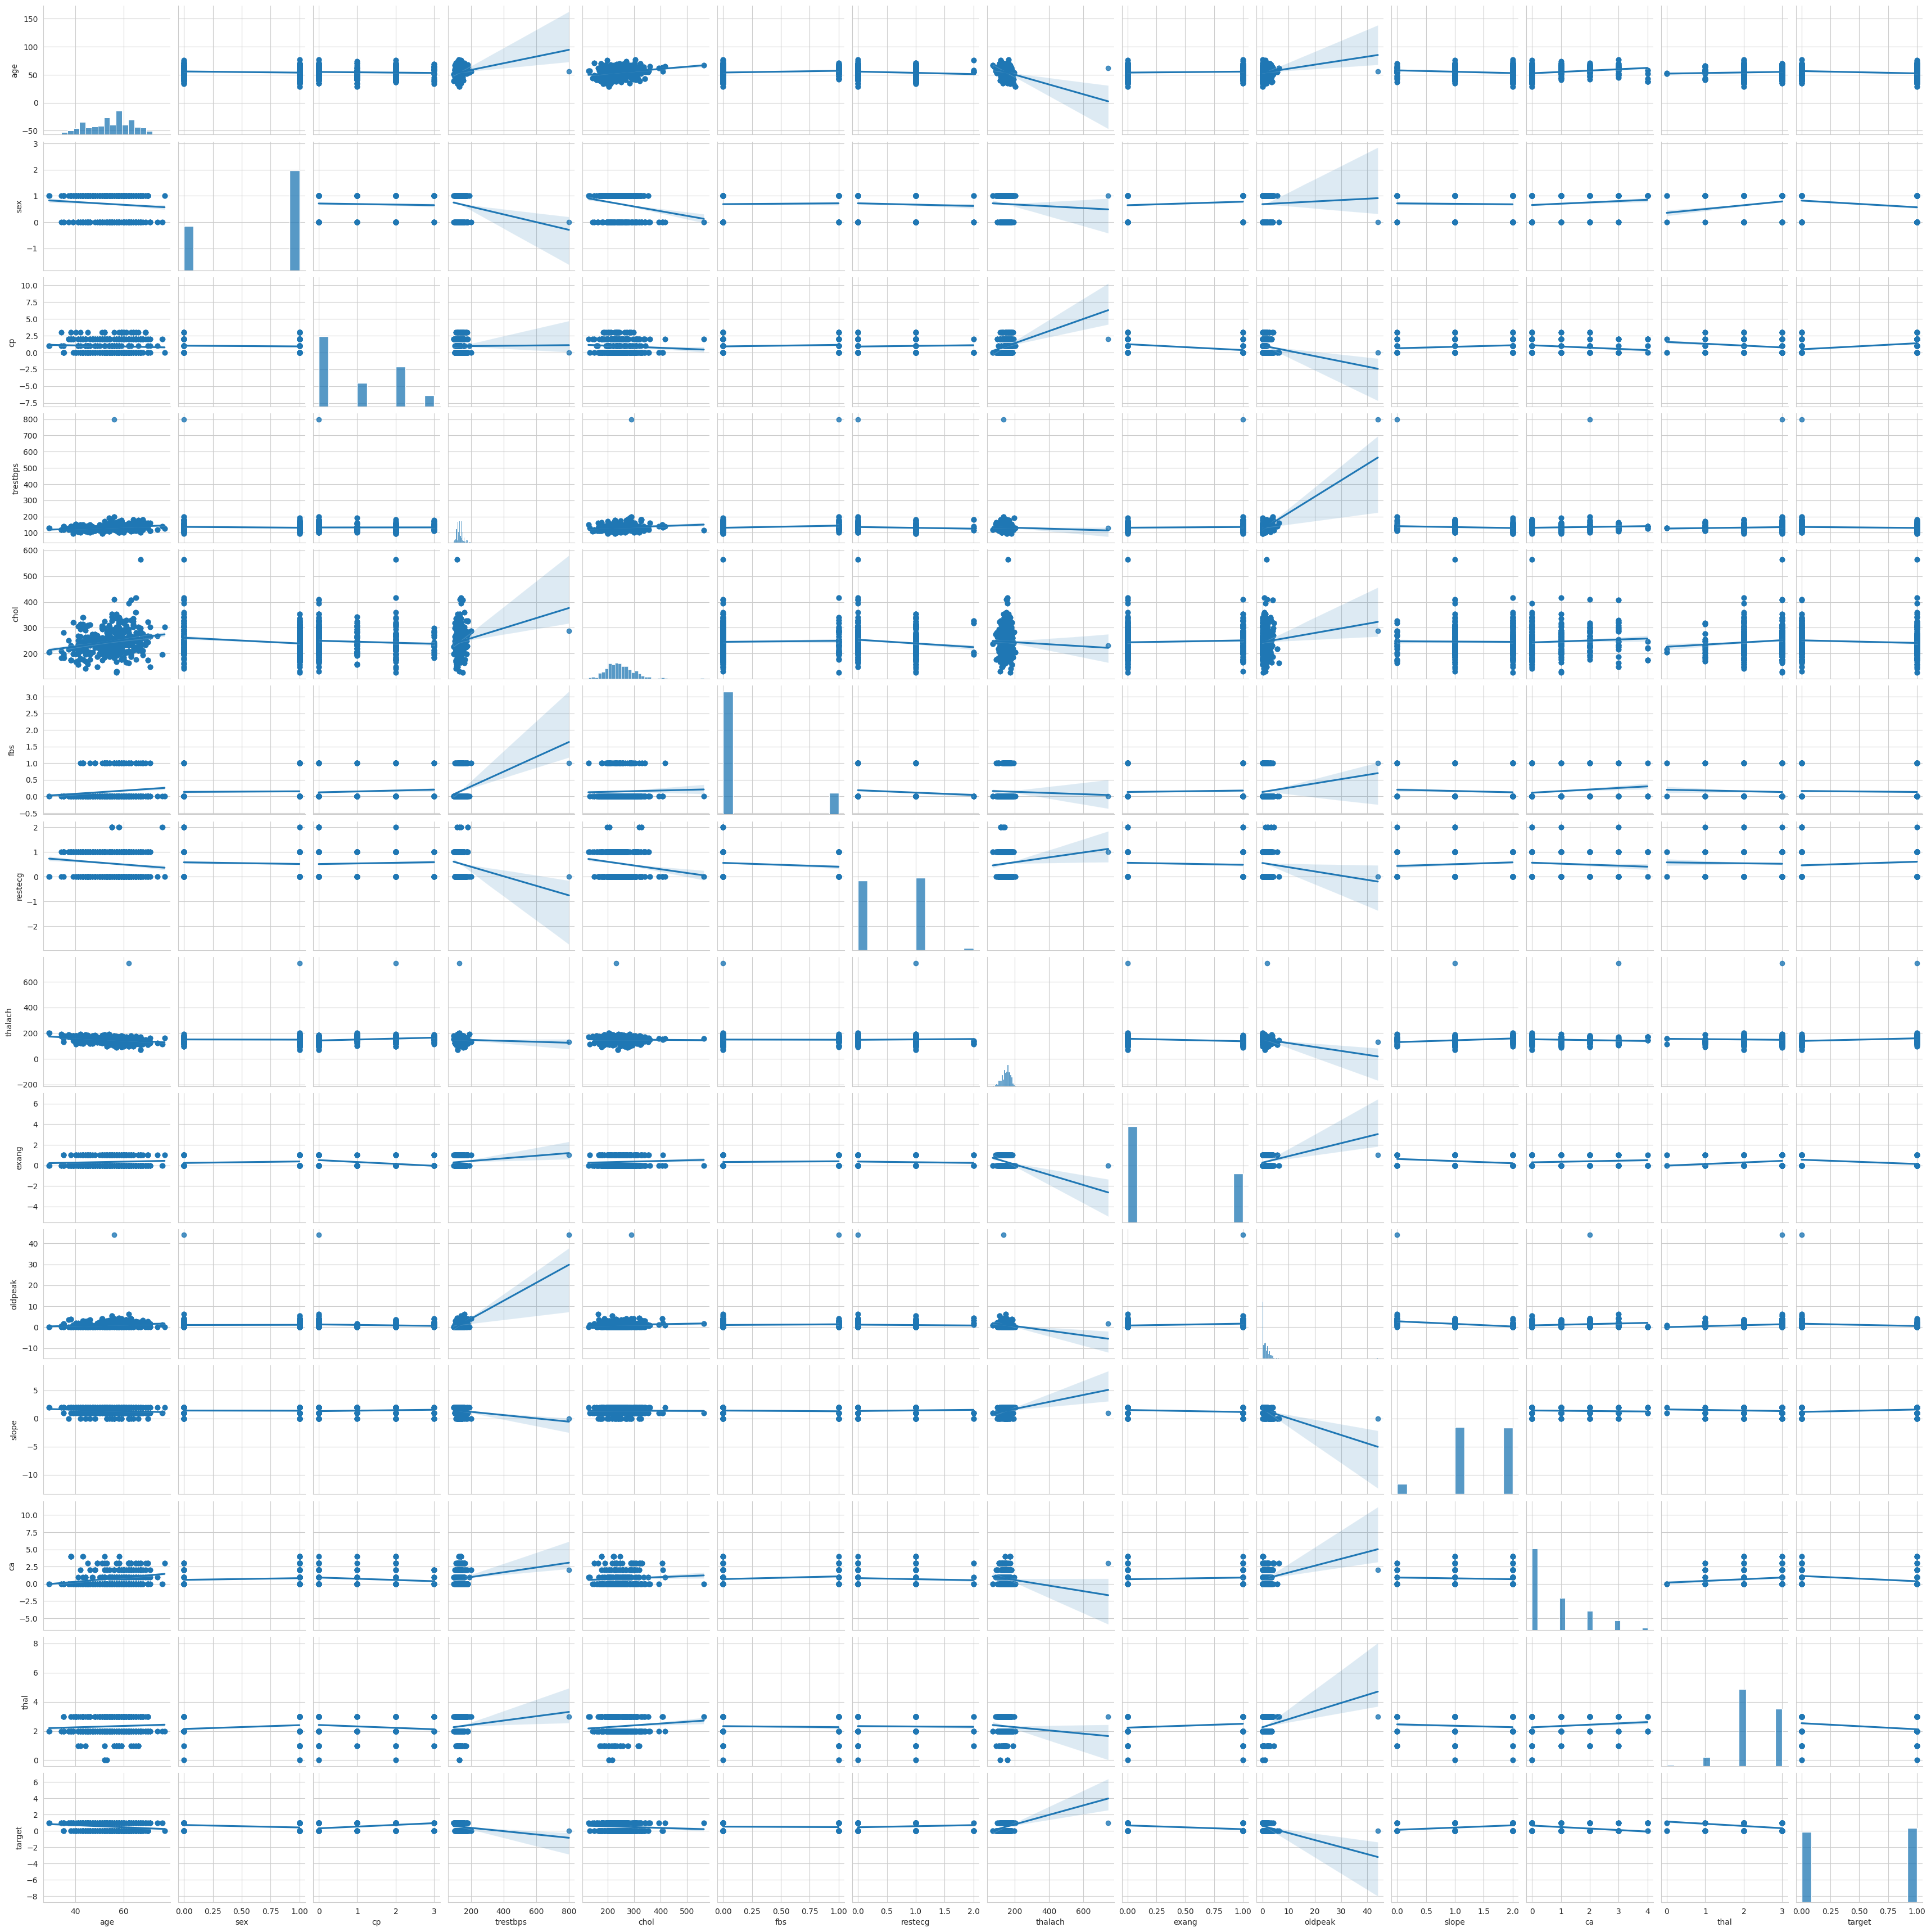

In [ ]:
sns.pairplot(df, kind="reg")

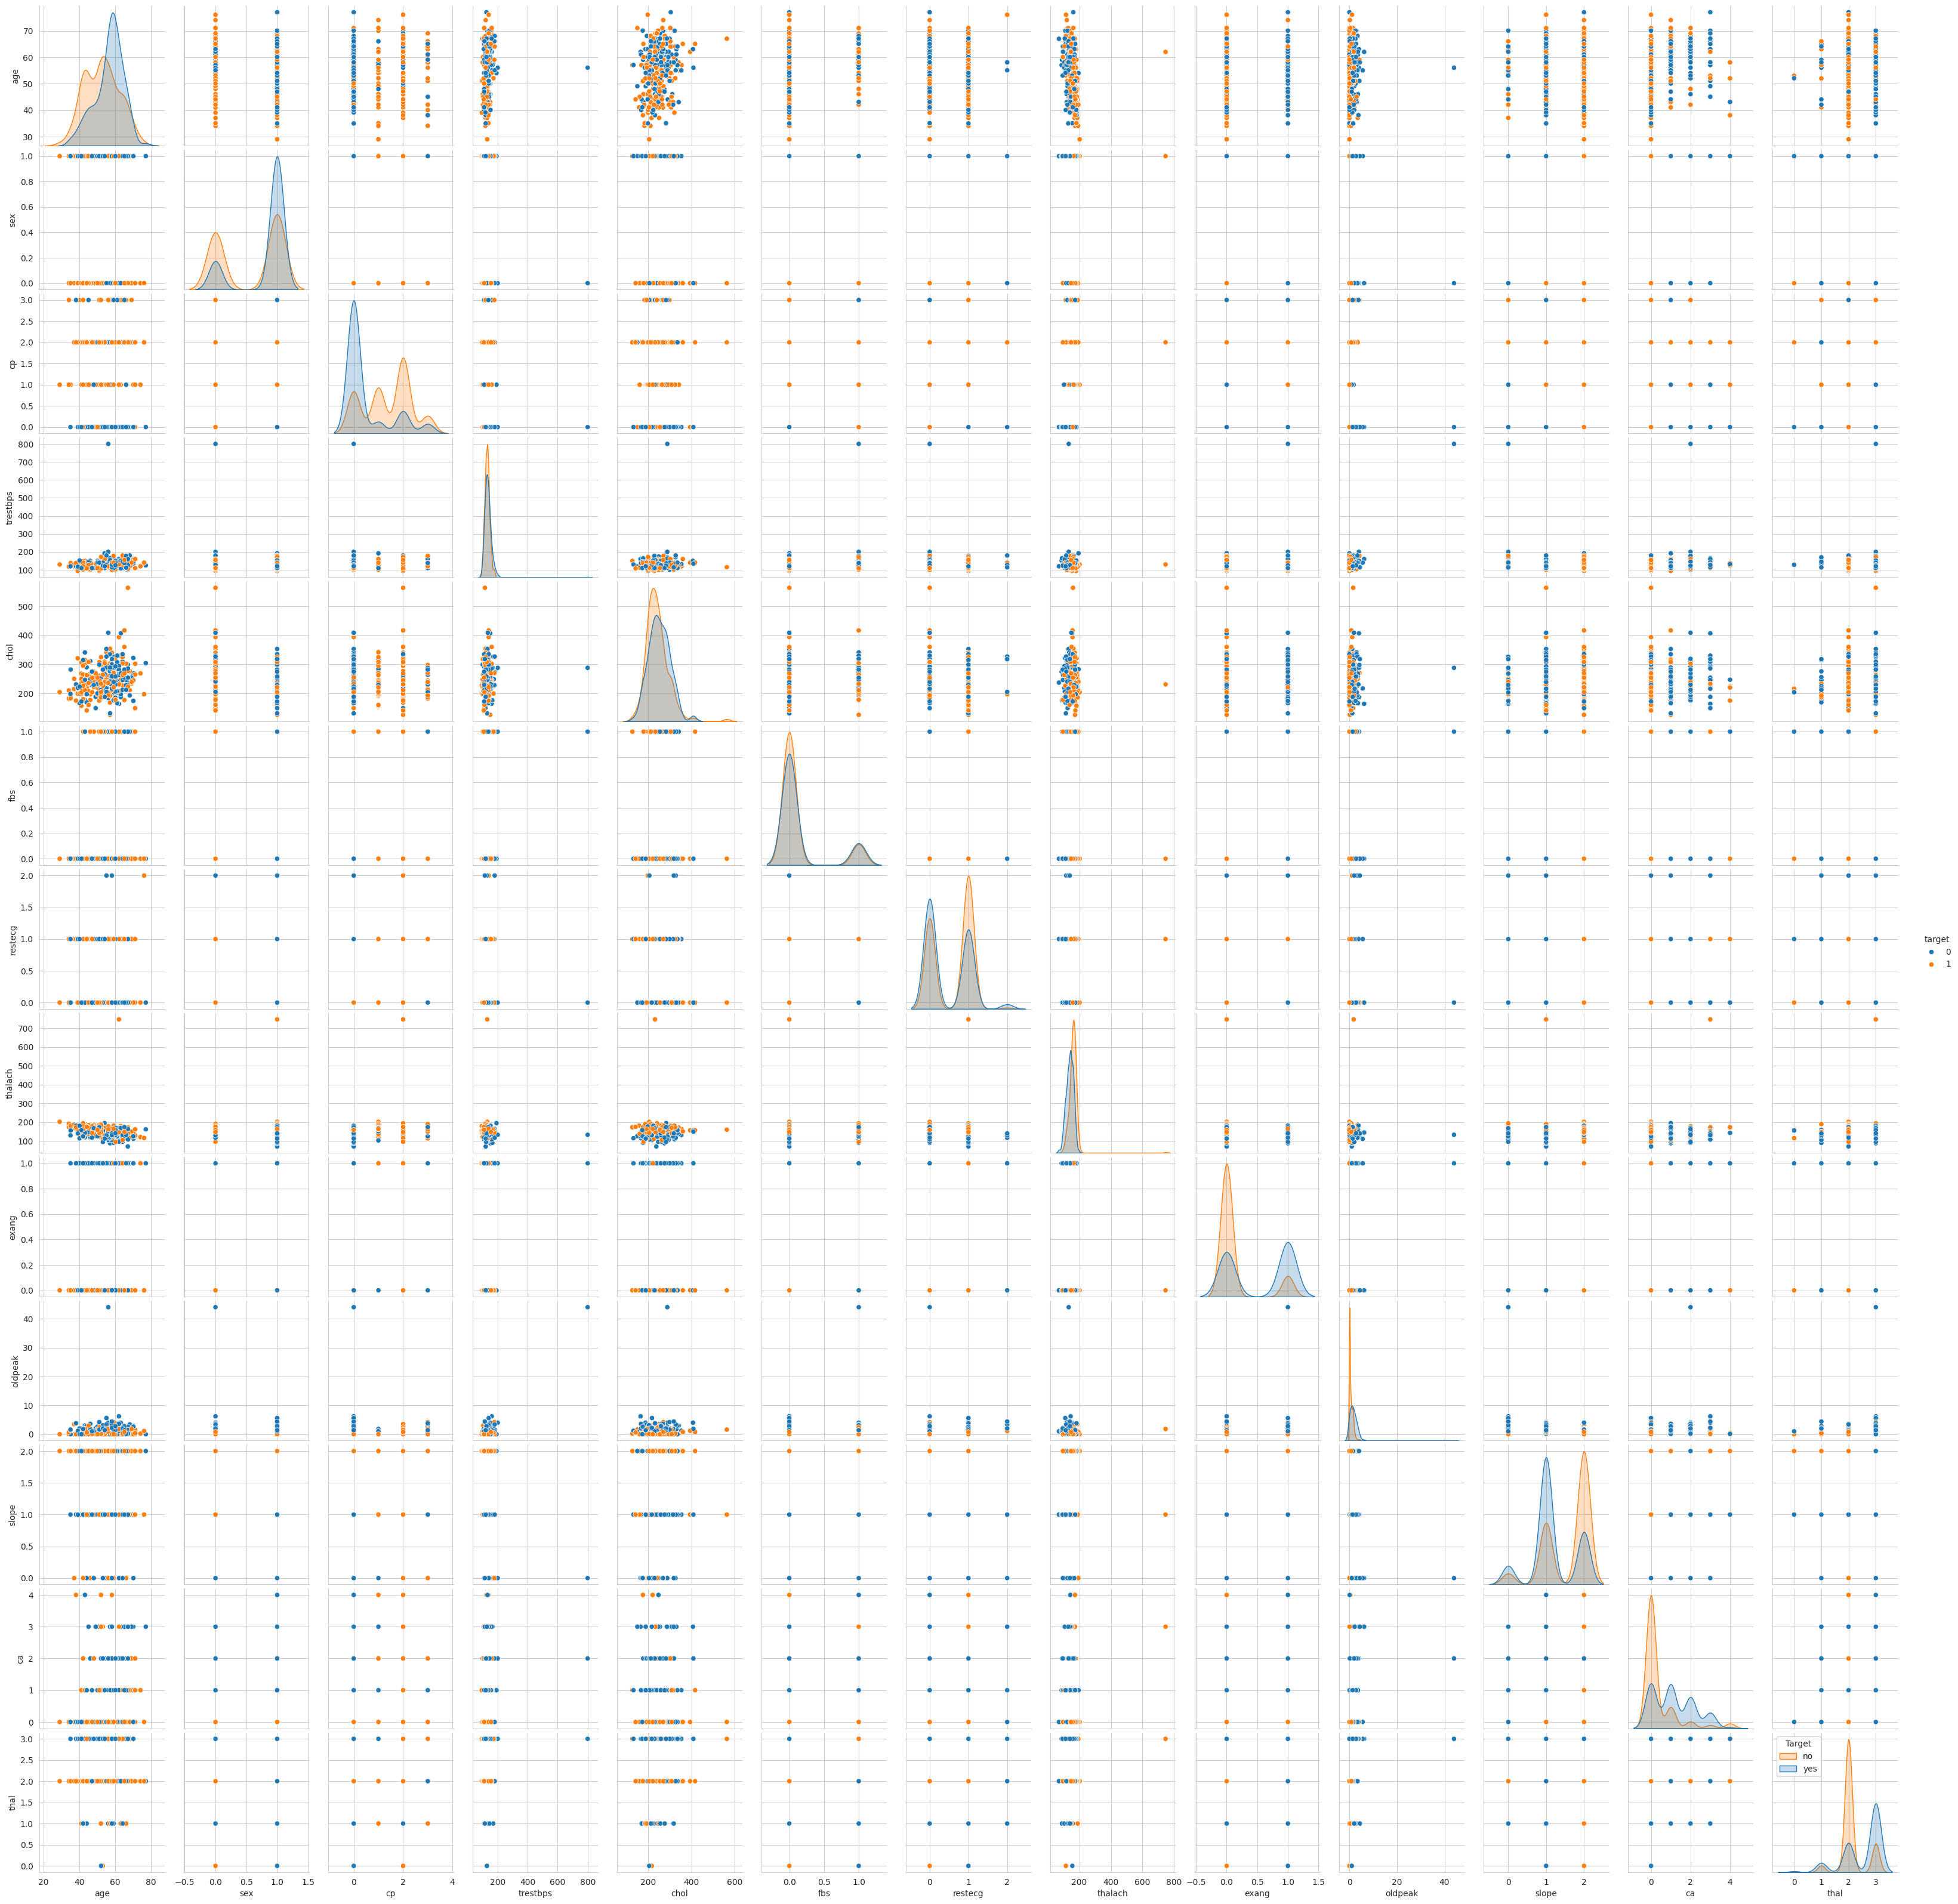

In [ ]:
sns.pairplot(df, kind='scatter', hue='target')
plt.legend(title="Target", labels=['no','yes'])
plt.show()
# blue = no, orange = yes

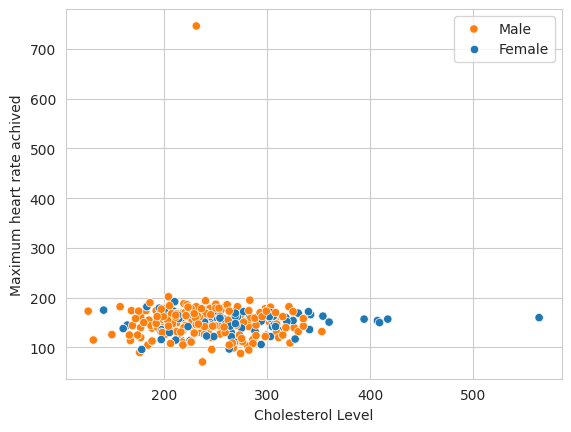

In [ ]:
sns.scatterplot(data=df, x='chol', y='thalach', hue='sex')
plt.xlabel("Cholesterol Level")
plt.ylabel("Maximum heart rate achived")
plt.legend(labels=['Male','Female'])
plt.show()

#Removing duplicates

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
duplicate_rows

# df.duplicated().sum()

NameError: name 'df' is not defined

In [ ]:
#duplicated rows shall be removed first as we feel that the duplicated rows may end up in both the training dataset and test/validation datasets.
#This is to avoid potential issues with biased performance estimates and data leakage.
#For example, duplicate entries which ended up on both train and test datasets, may cause bias when evaluating the model during test/validation as the model has already seen the specific data points during training
df = df.drop_duplicates()
df.shape

(1015, 14)

#Splitting dataset into Train, Validation, and Test datasets

In [ ]:
#train = 70%, validate = 15%, test = 15%
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
validate_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
print(len(train_df), len(validate_df), len(test_df))
print(len(train_df[train_df['target']==1]))
print(len(train_df[train_df['target']==0]))
train_df

710 152 153
371
339


age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
177  56.0178    0   0     134.0  409.0    0        0    150.0      1      1.9   
467  60.0468    0   3     150.0  240.0    0        1    171.0      0      0.9   
508  43.0000    1   0     120.0  177.0    0        0    120.0      1      2.5   
486  61.0487    1   2     150.0  243.0    1        1    137.0      1      1.0   
328  37.0529    0   2     120.0  215.0    0        1    170.0      0      0.0   
..       ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
106  62.0107    1   1     120.0  281.0    0        0    103.0      0      1.4   
270  54.0271    1   0     110.0  206.0    0        0    108.0      1      0.0   
865  60.0866    0   3     150.0  240.0    0        1    171.0      0      0.9   
435  67.0436    1   0     120.0  229.0    0        0    129.0      1      2.6   
102  47.0103    1   2     138.0  257.0    0        0    156.0      0      0.0   

     slope  ca  thal  target  
177      1   2     3       0  
467      2   0     2       1  
508      1   0     3       0  
486      1   0     2       1  
328      2   0     2       1  
..     ...  ..   ...     ...  
106      1   1     3       0  
270      1   1     2       0  
865      2   0     2       1  
435      1   2     3       0  
102      2   0     2       1  

[710 rows x 14 columns]

#Data imputation

In [ ]:
#data imputation shall be done after splitting dataset so that data leakage is prevented
from sklearn.impute import KNNImputer

float_cols = train_df.select_dtypes(include=['float']).columns

print(train_df[float_cols].isna().sum())
print(validate_df[float_cols].isna().sum())
print(test_df[float_cols].isna().sum())


imputer = KNNImputer(n_neighbors=5)
train_float_imputed = imputer.fit_transform(train_df[float_cols])
validate_float_imputed = imputer.transform(validate_df[float_cols])
test_float_imputed = imputer.transform(test_df[float_cols])

train_imputed = train_df.copy()
validate_imputed = validate_df.copy()
test_imputed = test_df.copy()

train_imputed[float_cols] = train_float_imputed
validate_imputed[float_cols] = validate_float_imputed
test_imputed[float_cols] = test_float_imputed

#should be all zero
print("should be all zero")
print(train_imputed[float_cols].isnull().sum())
print(validate_imputed[float_cols].isnull().sum())
print(test_imputed[float_cols].isnull().sum())

age         1
trestbps    0
chol        1
thalach     0
oldpeak     0
dtype: int64
age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64
age         1
trestbps    0
chol        0
thalach     1
oldpeak     1
dtype: int64
should be all zero
age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64
age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64
age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64


#EDA on the train dataframe after imputation

##Feature importances

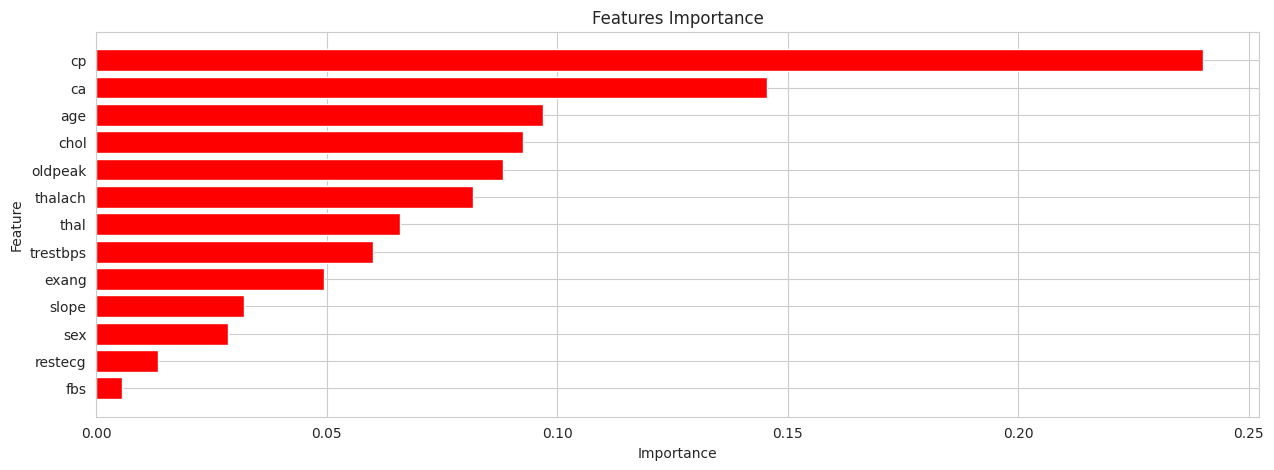

In [ ]:
#done before scaling
#temporary X_train and y_train are used to plot the feature importances matrix and RandomForestClassifier
X_train = train_imputed.drop('target', axis=1)
y_train = train_imputed['target']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=8)  # Select top 8 features
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", list(selected_features))

Selected Features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']


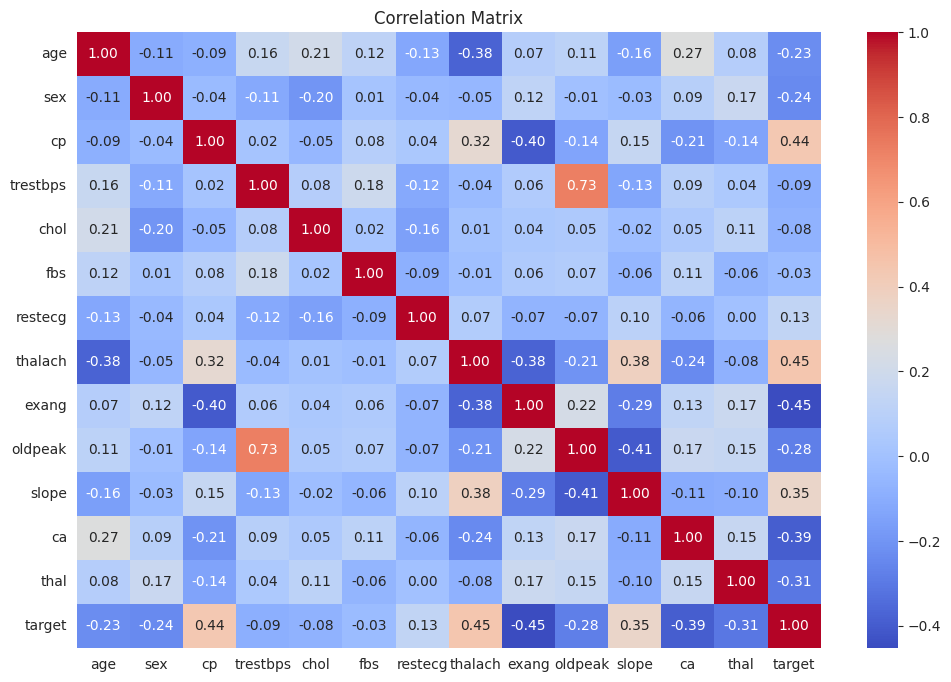

In [ ]:
corr = train_imputed.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

based on the correlation matrix above, it appears that the correlation between oldpeak and trestbps has increased to 0.73 after data imputation

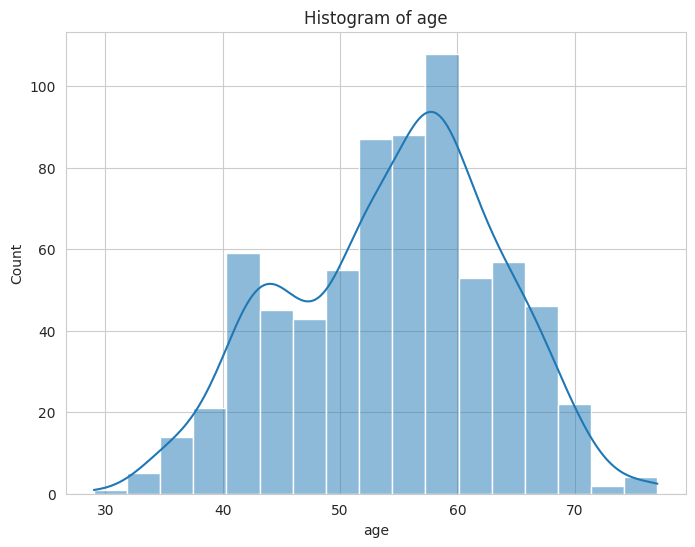

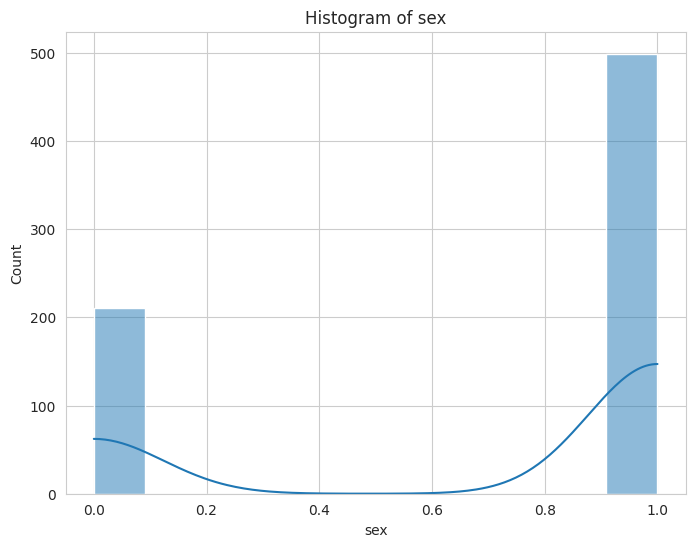

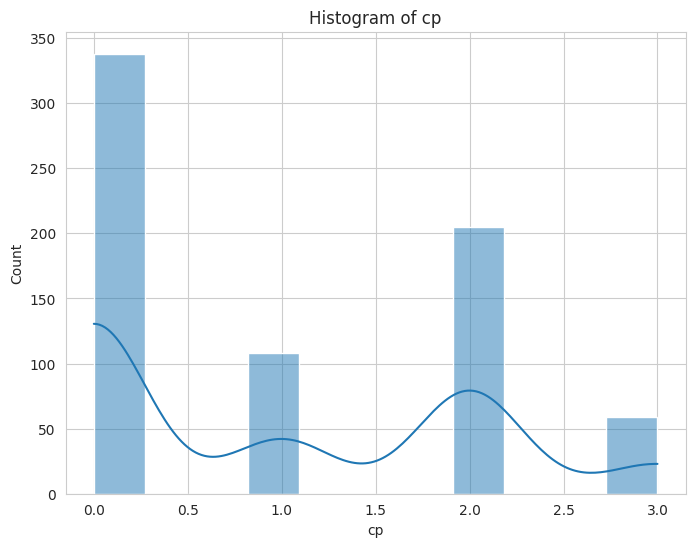

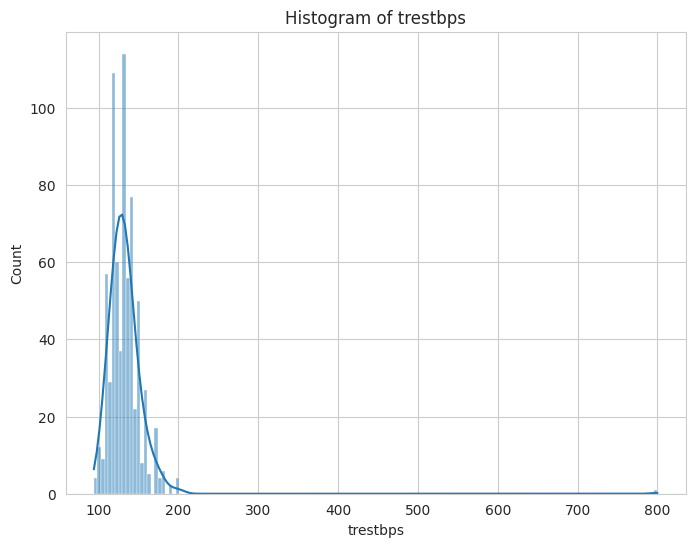

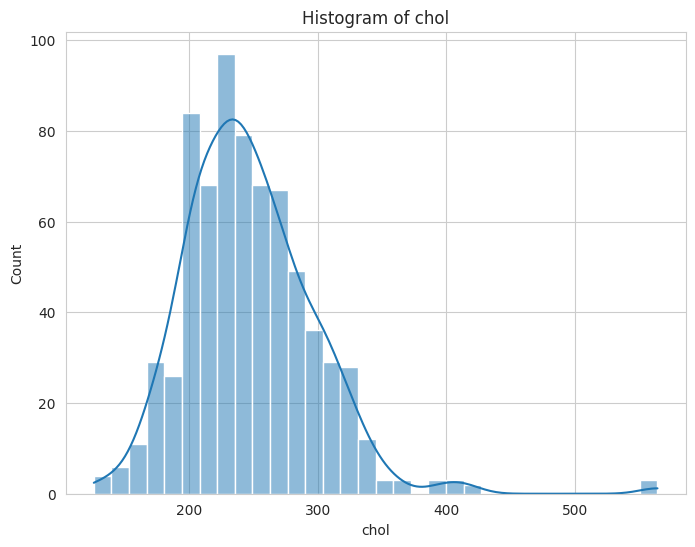

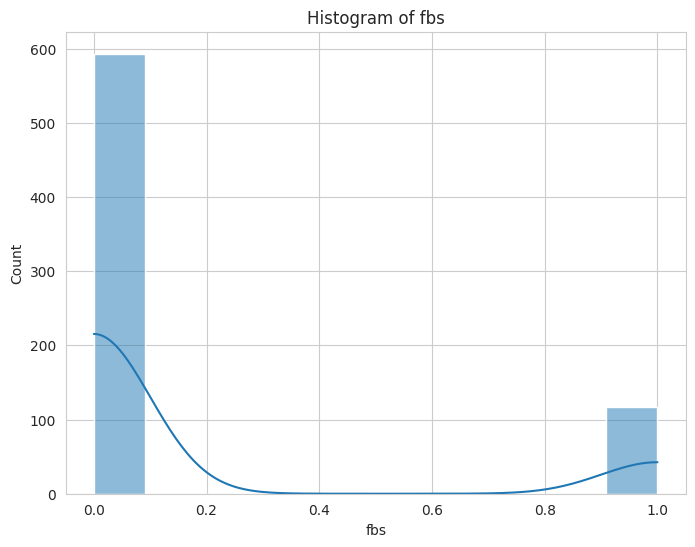

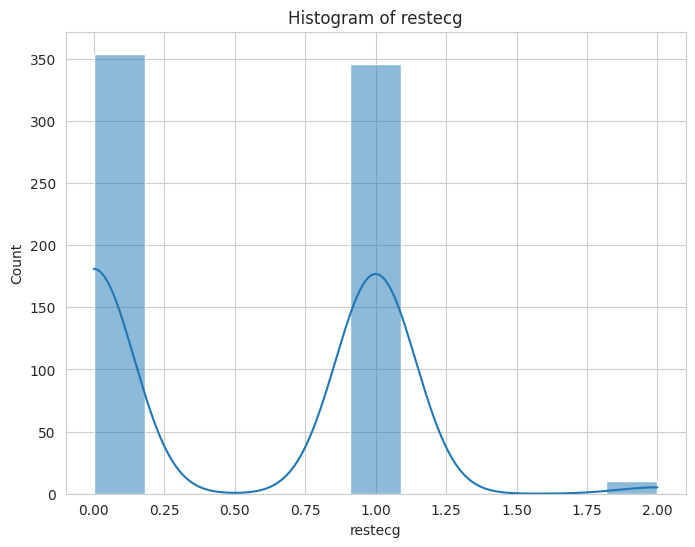

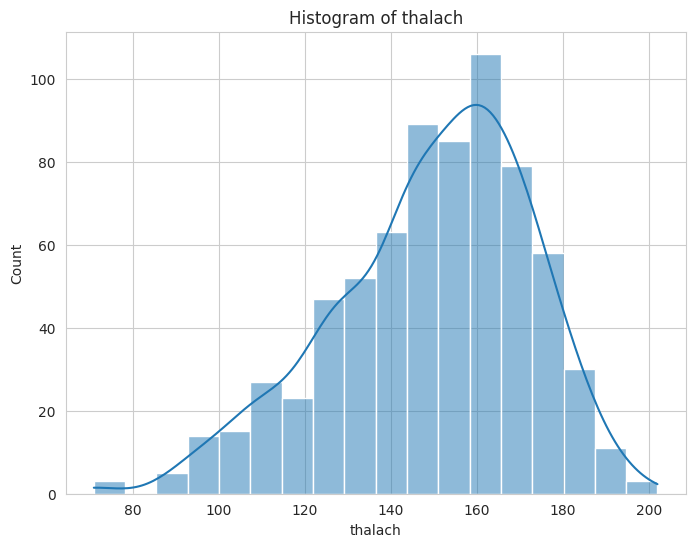

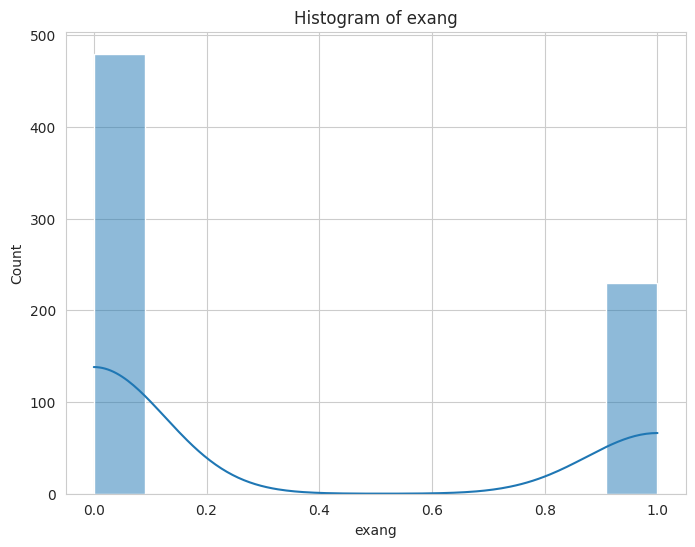

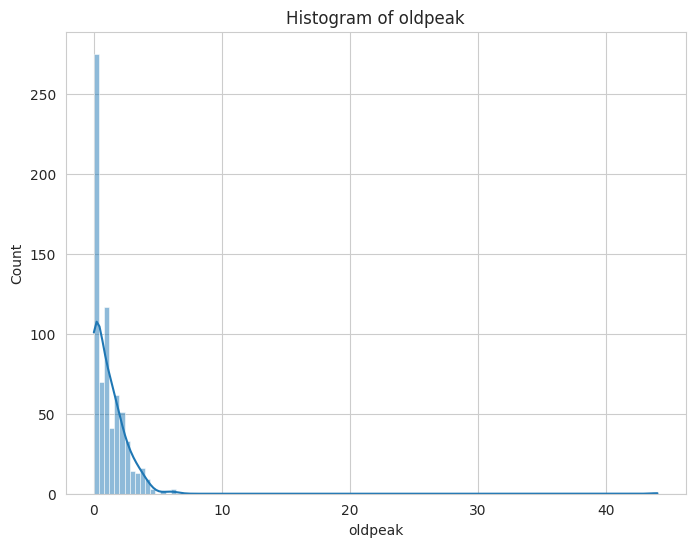

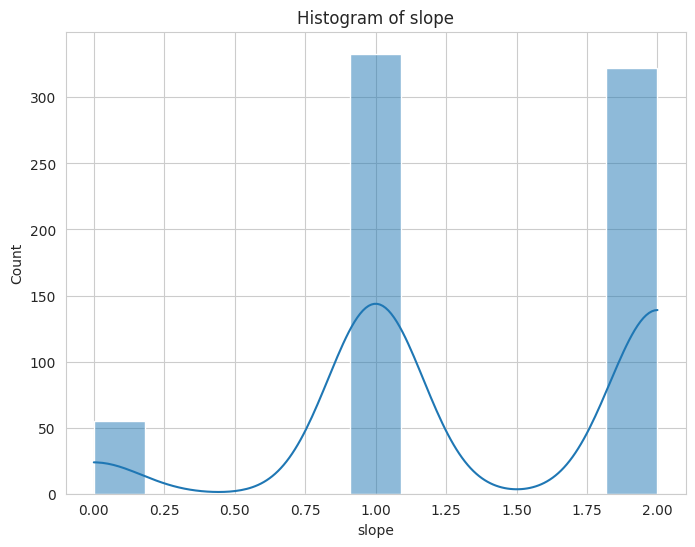

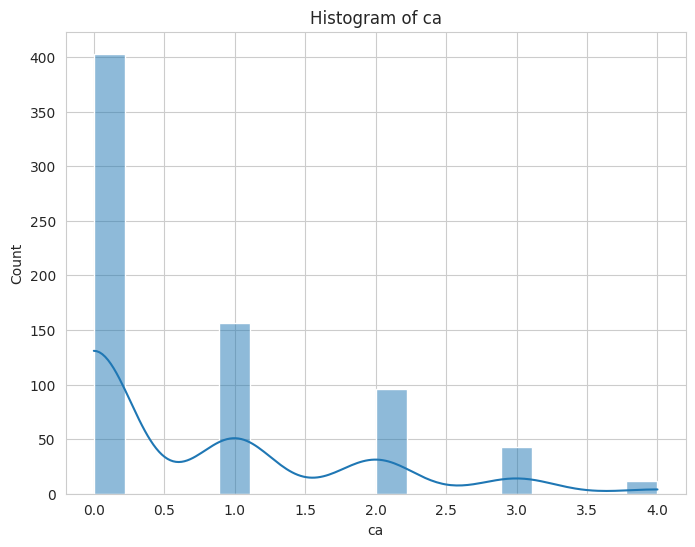

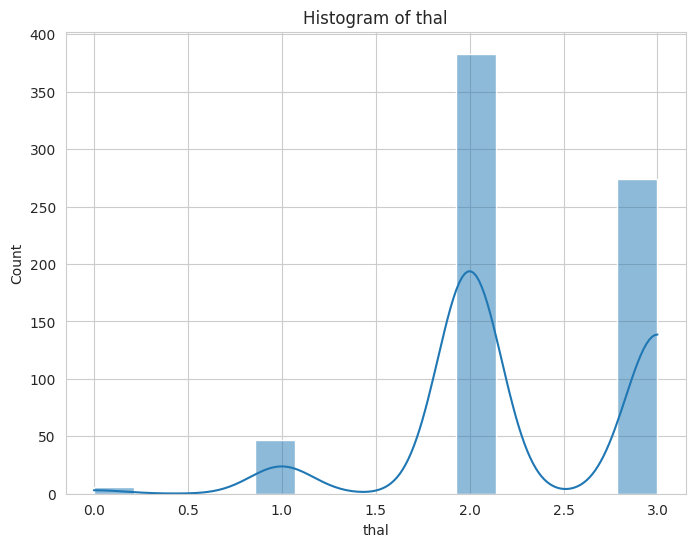

In [ ]:
#histogram
for col in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

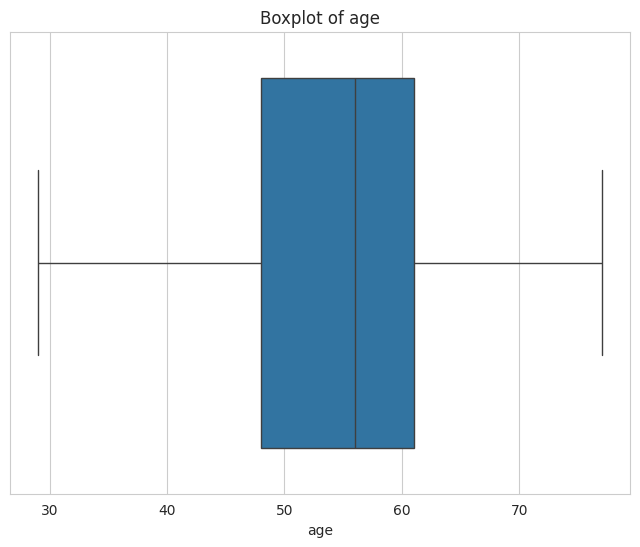

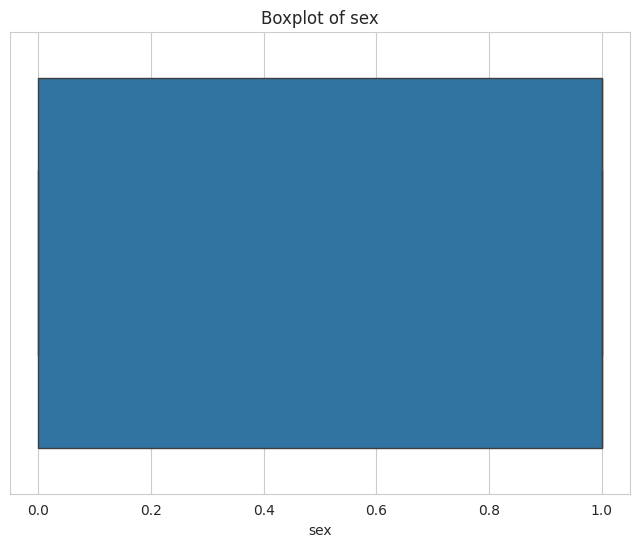

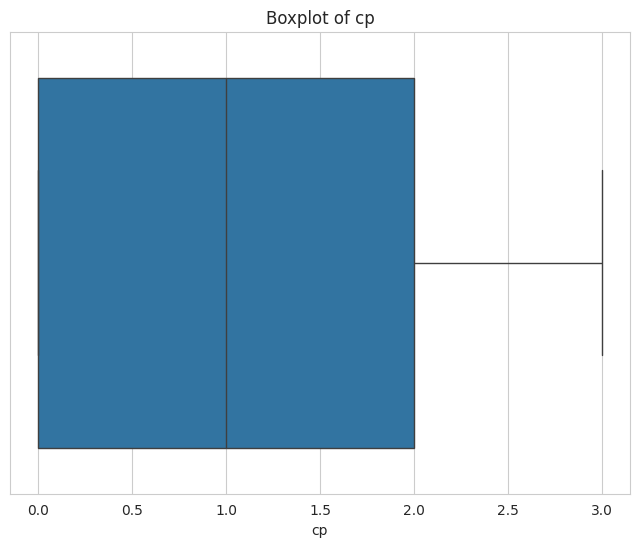

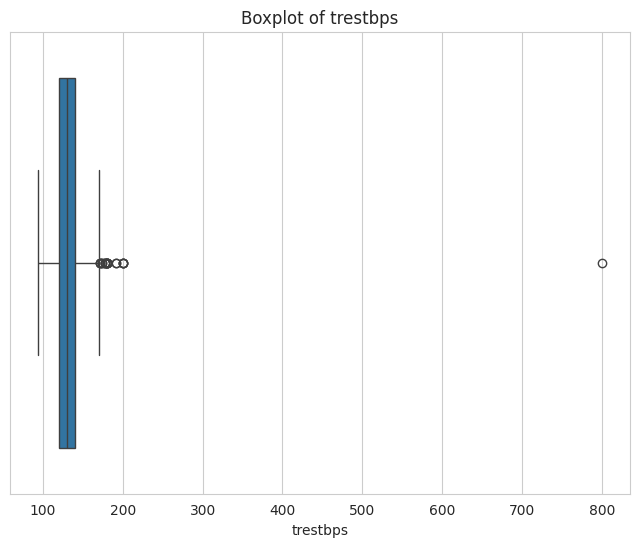

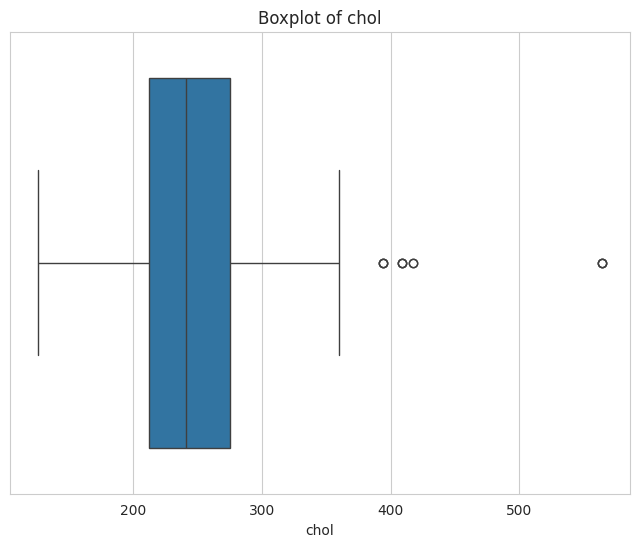

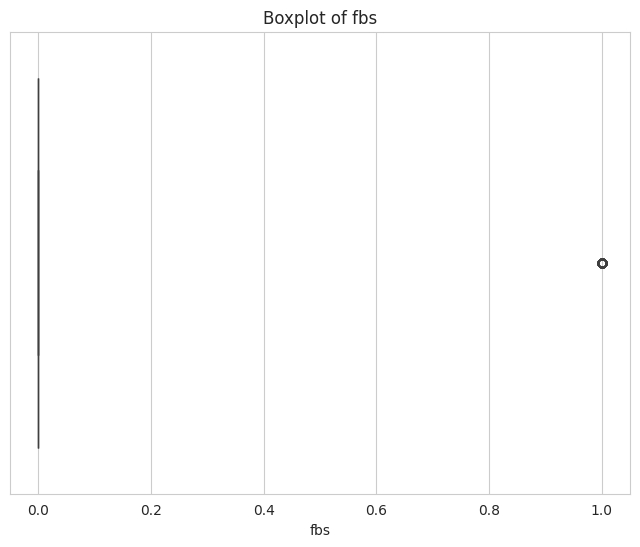

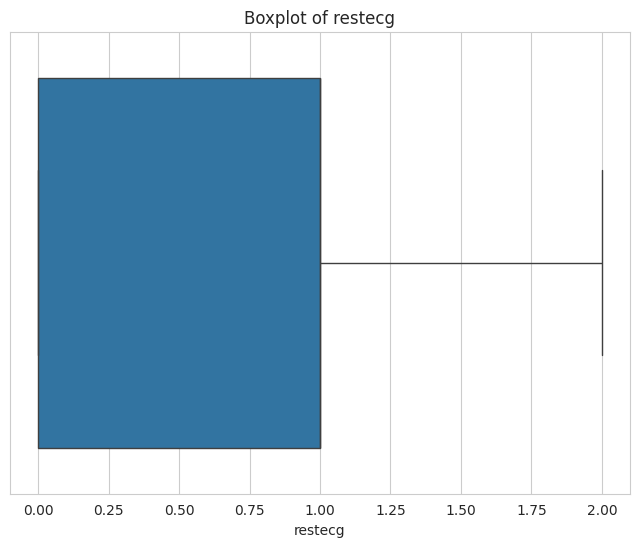

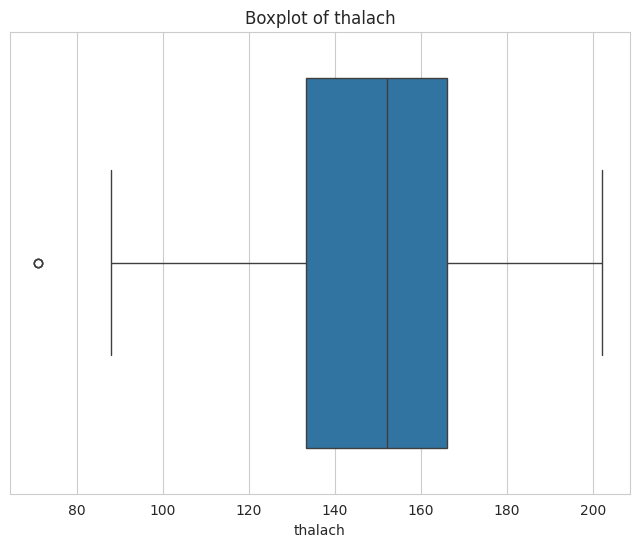

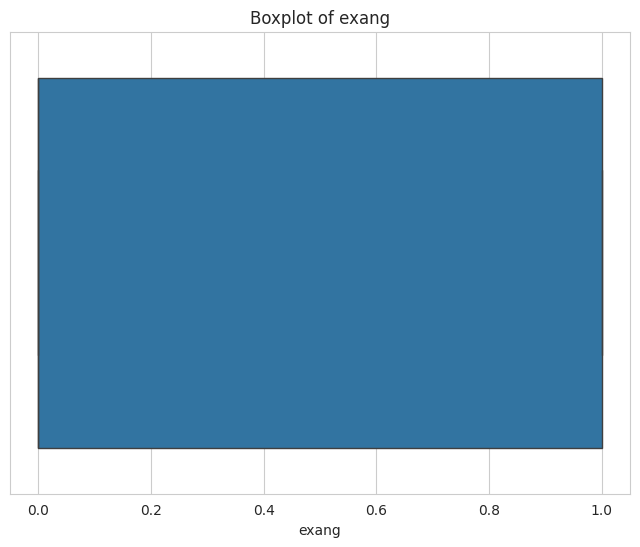

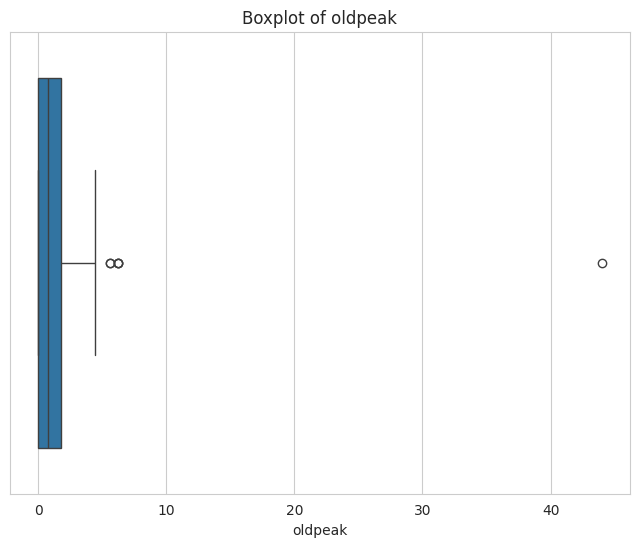

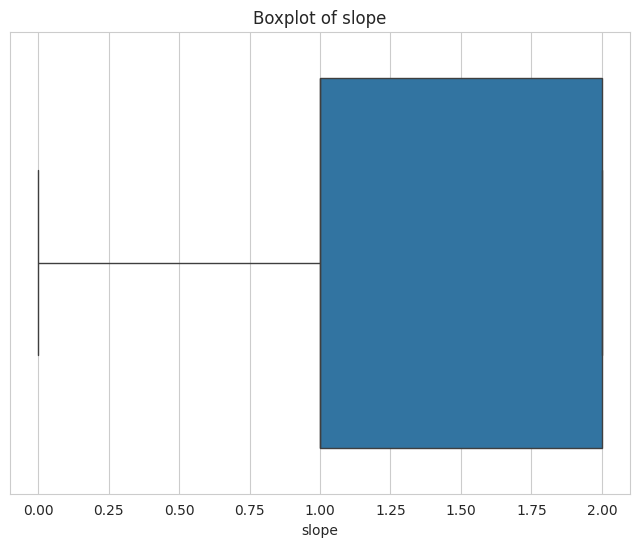

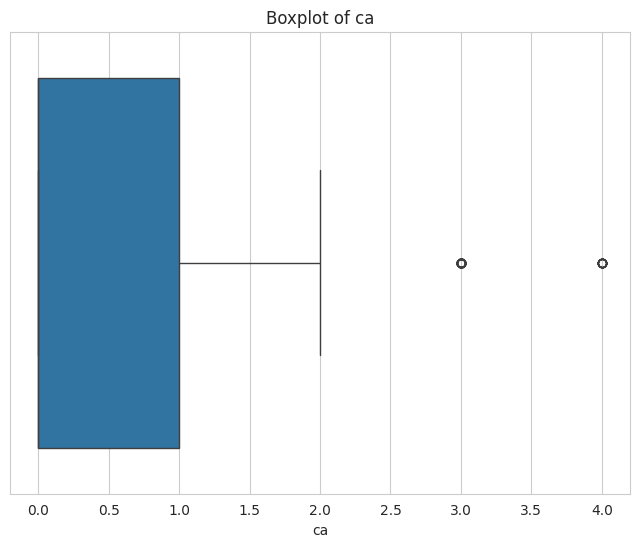

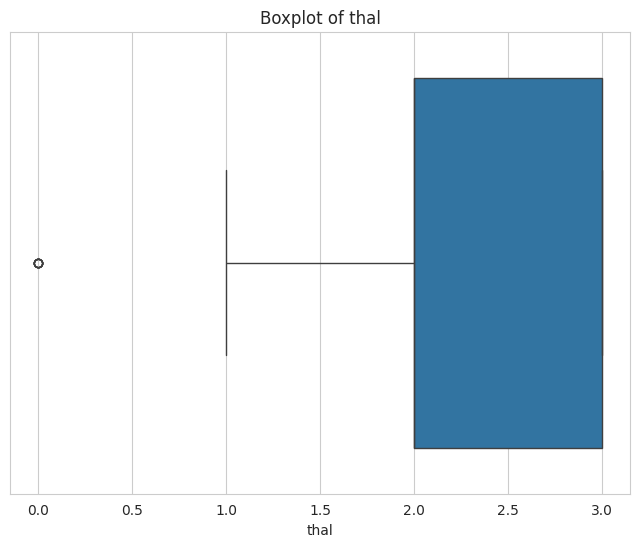

In [ ]:
#boxplots
for col in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#Feature reduction

In [ ]:
#feature reduction
#exclude trestbps to avoid multicollinearity as it has a correlation with oldpeak with a value of 0.73
selected_features = ['cp', 'ca', 'age', 'chol', 'oldpeak', 'thalach', 'thal', 'target']
train_imputed = train_imputed[selected_features]
validate_imputed = validate_imputed[selected_features]
test_imputed = test_imputed[selected_features]

#Scaling Data
##todo: scale the data using standardscaler, detect outliers, and treat outliers

In [ ]:
# Select only float columns
float_cols = train_imputed.select_dtypes(include=['float']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit-transform on train and transform on validation and test (only for float columns)
train_imputed[float_cols]= scaler.fit_transform(train_imputed[float_cols])
validate_imputed[float_cols]=scaler.transform(validate_imputed[float_cols])
test_imputed[float_cols]=scaler.transform(test_imputed[float_cols])

train_df = train_imputed
validate_df = validate_imputed
test_df = test_imputed

In [ ]:
print(len(train_df[train_df['target'] == 1]))
print(len(train_df[train_df['target'] == 0]))

371
339


In [ ]:
#outliers in the train dataset
outliers_train = train_df[(train_df[train_df.select_dtypes(include=['float64']).columns] >= 3).any(axis=1) | (train_df[train_df.select_dtypes(include=['float64']).columns] >= 3).any(axis=1)]
print("Rows with Outliers in Train Dataset:")
outliers_train

Rows with Outliers in Train Dataset:


cp  ca       age      chol    oldpeak   thalach  thal  target
177   0   2  0.169262  3.155092   0.390268  0.023851     3       0
190   2   0  1.411909  6.174468   0.239430  0.460296     3       1
122   2   1  1.185231  3.310931  -0.162807  0.329362     2       1
640   0   2  0.174492  3.155092   0.390268  0.023851     3       0
997   0   2  0.178525  3.155092   0.390268  0.023851     3       0
156   2   0  1.411524  6.174468   0.239430  0.460296     3       1
767   0   2  0.175927  0.798031  21.557958 -0.718106     3       0
461   2   0  1.414970  6.174468   0.239430  0.460296     3       1
664   2   1  1.191354  3.310931  -0.162807  0.329362     2       1

In [ ]:
#remove outliers
train_df.drop(outliers_train.index, inplace=True)
print(len(train_df[train_df['target'] == 1]))
print(len(train_df[train_df['target'] == 0]))

366
335


In [ ]:
#based on the train dataframe above, we see that oversampling is needed as the rows where the target is 1 is slightly more than target is 0
def separate_dataset(dataframe, resampling=False):
  feature_cols = dataframe.columns[:-1]
  target_col = dataframe.columns[-1]

  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  if resampling:
    ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
    X, y = ros.fit_resample(X, y)

  X = pd.DataFrame(X, columns=feature_cols)
  y = pd.DataFrame(y, columns=[target_col])

  categorical_cols = dataframe.select_dtypes(include=['int64']).columns[:-1]
  X[categorical_cols] = X[categorical_cols].astype('int64')

  y[target_col] = y[target_col].astype('int64')
  return X, y

X_train, y_train = separate_dataset(train_df, resampling=True) #final dataset
X_validate, y_validate = separate_dataset(validate_df, resampling=False) #final dataset
X_test, y_test = separate_dataset(test_df, resampling=False) #final dataset

print(len(X_train), len(X_validate), len(X_test))

732 152 153


In [ ]:
print(len(X_train))
print(len(y_train[y_train['target']==1]))
print(len(y_train[y_train['target']==0]))

732
366
366


In [ ]:
#outliers in the train dataset
outliers_train = X_train[(X_train[X_train.select_dtypes(include=['float64']).columns] >= 3).any(axis=1) | (X_train[X_train.select_dtypes(include=['float64']).columns] >= 3).any(axis=1)]
print("number of outliers: ", len(outliers_train))
print("Rows with Outliers in Train Dataset:")
outliers_train

number of outliers:  0
Rows with Outliers in Train Dataset:


Empty DataFrame
Columns: [cp, ca, age, chol, oldpeak, thalach, thal]
Index: []

#Model training before hyperparameters tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC, LinearSVC #svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #RandomForest, AdaBoost and GradientBoost
from sklearn.neural_network import MLPClassifier #neutral network
from xgboost import XGBClassifier #xbg
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Classification Report for KNN (Test):
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        86
           1       0.76      0.75      0.75        67

    accuracy                           0.78       153
   macro avg       0.78      0.78      0.78       153
weighted avg       0.78      0.78      0.78       153

ROC AUC for KNN (Test): 0.91

Classification Report for Naive Bayes (Test):
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        86
           1       0.73      0.81      0.77        67

    accuracy                           0.78       153
   macro avg       0.78      0.79      0.78       153
weighted avg       0.79      0.78      0.79       153

ROC AUC for Naive Bayes (Test): 0.82

Classification Report for Decision Tree (Test):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        86
           1       0.96      1.00    

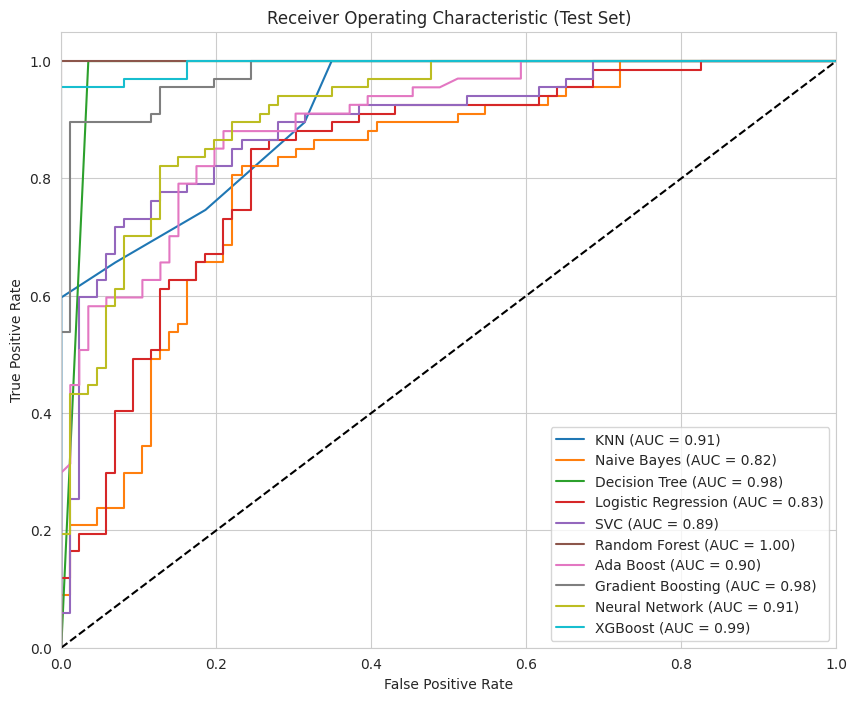

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_estimators=10, random_state=42)
}

# Create a figure for ROC curves (test set only)
plt.figure(figsize=(10, 8))

# Loop through classifiers and calculate evaluation metrics
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Test set performance
    y_pred_test = classifier.predict(X_test)
    classification_rep_test = classification_report(y_test, y_pred_test)
    print(f"Classification Report for {classifier_name} (Test):\n{classification_rep_test}")

    # ROC AUC for test set
    y_scores_test = classifier.predict_proba(X_test)[:, 1]
    roc_auc_test = roc_auc_score(y_test, y_scores_test)
    print(f"ROC AUC for {classifier_name} (Test): {roc_auc_test:.2f}\n")

    # Plot ROC curve for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_name} (AUC = {roc_auc_test:.2f})')

# Finalize test ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_patients = pd.read_csv('/content/HeartNewPatients.csv')
new_patients

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   49    1   2       120   188    0        1      139      0      2.0      1   
1   54    1   2       120   258    0        0      147      0      0.4      1   
2   57    1   0       165   289    1        0      124      0      1.0      1   
3   57    1   0       110   335    0        1      143      1      3.0      1   
4   49    0   1       134   271    0        1      162      0      0.0      1   
5   69    1   2       140   254    0        0      146      0      2.0      1   
6   45    0   1       130   234    0        0      175      0      0.6      1   
7   44    1   2       120   226    0        1      169      0      0.0      2   
8   35    0   0       138   183    0        1      182      0      1.4      2   
9   65    1   0       120   177    0        1      140      0      0.4      2   

   ca  thal  target  
0   3     3       0  
1   0     3       1  
2   3     3       0  
3   1     3       0  
4   0     2       1  
5   3     3       0  
6   0     2       1  
7   0     2       1  
8   0     2       1  
9   0     3       1

In [ ]:
X_new_data = new_patients[selected_features[:-1]]
y_new_data = new_patients[selected_features[-1]]
X_new_data

cp  ca  age  chol  oldpeak  thalach  thal
0   2   3   49   188      2.0      139     3
1   2   0   54   258      0.4      147     3
2   0   3   57   289      1.0      124     3
3   0   1   57   335      3.0      143     3
4   1   0   49   271      0.0      162     2
5   2   3   69   254      2.0      146     3
6   1   0   45   234      0.6      175     2
7   2   0   44   226      0.0      169     2
8   0   0   35   183      1.4      182     2
9   0   0   65   177      0.4      140     3

In [ ]:
X_new_data[float_cols] = scaler.transform(X_new_data[float_cols])
X_new_standardized_data = X_new_data
X_new_standardized_data

cp  ca       age      chol   oldpeak   thalach  thal
0   2   3 -0.623430 -1.149953  0.440548 -0.456239     3
1   2   0 -0.058657  0.213636 -0.363925 -0.107083     3
2   0   3  0.280206  0.817511 -0.062247 -1.110907     3
3   0   1  0.280206  1.713584  0.943343 -0.281661     3
4   1   0 -0.623430  0.466874 -0.565043  0.547585     2
5   2   3  1.635660  0.135717  0.440548 -0.150727     3
6   1   0 -1.075248 -0.253880 -0.263366  1.114964     2
7   2   0 -1.188202 -0.409719 -0.565043  0.853097     2
8   0   0 -2.204792 -1.247352  0.138871  1.420475     2
9   0   0  1.183842 -1.364231 -0.363925 -0.412594     3

Classification Report for KNN (New Data):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

ROC AUC for KNN (New Data): 1.00

Sample predictions for KNN: [0 1 0 0 1 0 1 1 1 0]...

Classification Report for Naive Bayes (New Data):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

ROC AUC for Naive Bayes (New Data): 1.00

Sample predictions for Naive Bayes: [0 1 0 0 1 0 1 1 1 0]...

Classification Report for Decision Tree (New Data):
          

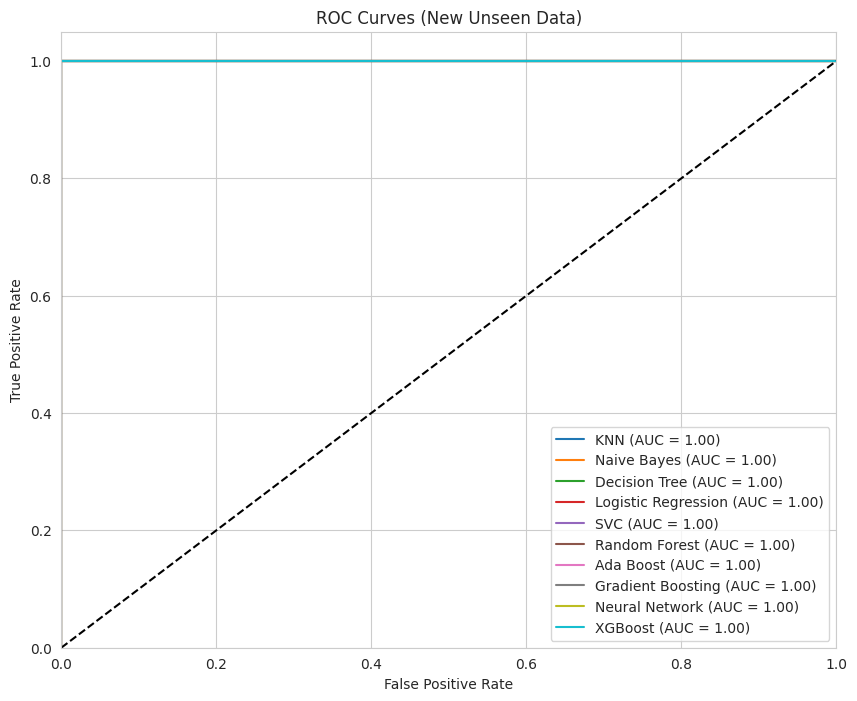

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

for classifier_name, classifier in classifiers.items():
    # Predict on new data
    Y_prediction_new = classifier.predict(X_new_standardized_data)
    Y_scores_new = classifier.predict_proba(X_new_standardized_data)[:, 1]  # Probability scores for ROC

    # Generate classification report
    classification_rep = classification_report(y_new_data, Y_prediction_new)
    print(f"Classification Report for {classifier_name} (New Data):\n{classification_rep}")

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_new_data, Y_scores_new)
    print(f"ROC AUC for {classifier_name} (New Data): {roc_auc:.2f}\n")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_new_data, Y_scores_new)
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    # Print predictions (optional)
    print(f"Sample predictions for {classifier_name}: {Y_prediction_new[:10]}...\n")

    cm = confusion_matrix (y_new_data, Y_prediction_new)


# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (New Unseen Data)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for classifier_name, classifier in classifiers.items():
  Y_prediction_new = classifier.predict(X_new_standardized_data)
  print(f"Predictions for {classifier_name}: {Y_prediction_new}\n")

Predictions for KNN: [0 1 0 0 1 0 1 1 1 0]

Predictions for Naive Bayes: [0 1 0 0 1 0 1 1 1 0]

Predictions for Decision Tree: [0 1 0 0 1 0 1 1 1 1]

Predictions for Logistic Regression: [0 1 0 0 1 0 1 1 1 0]

Predictions for SVC: [0 1 0 0 1 0 1 1 1 1]

Predictions for Random Forest: [0 1 0 0 1 0 1 1 1 1]

Predictions for Ada Boost: [0 1 0 0 1 0 1 1 1 0]

Predictions for Gradient Boosting: [0 1 0 0 1 0 1 1 1 1]

Predictions for Neural Network: [0 1 0 0 1 0 1 1 1 1]

Predictions for XGBoost: [0 1 0 0 1 0 1 1 1 1]



#Fine tune models to see the best parameters for the models

In [ ]:
print(len(X_train))
print(len(X_validate))
print(len(X_test))

732
152
153


##KNN

Best k value: 1
Best f1-score: 0.9940119760479041
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        67

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



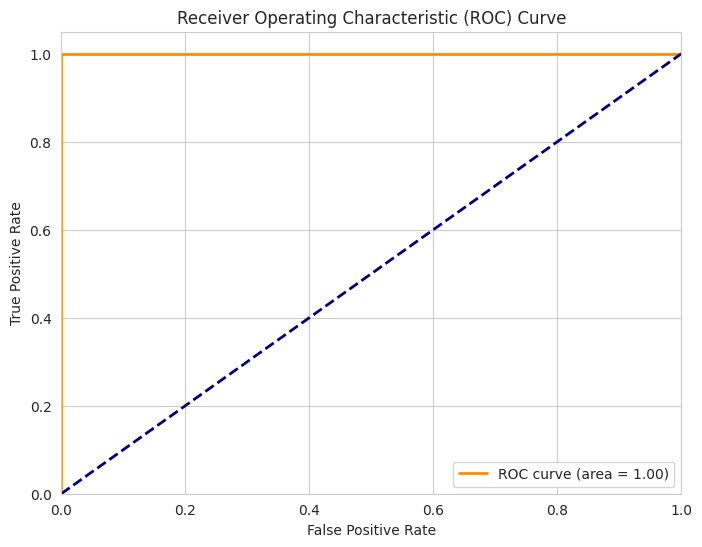

In [ ]:
# Initialize variables to store best k value and corresponding f1-score
best_k = None
best_f1_score = 0

# Initialize lists to store f1-scores and ROC AUC scores for each k
f1_scores = []
roc_auc_scores = []

# Loop through k values from 1 to 21, increment by 2
for k in range(1, 21, 2):
    # Create KNN model with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on resampled training data
    knn.fit(X_train, y_train)

    # Validate the model on validation dataset
    y_pred = knn.predict(X_validate)

    # Calculate f1-score
    f1 = f1_score(y_validate, y_pred)

    # Store f1-score for current k value
    f1_scores.append(f1)

    # Store ROC AUC score for current k value
    roc_auc_scores.append(roc_auc_score(y_validate, y_pred))

    # Check if current f1-score is better than the best f1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k = k

# Print the best k value and corresponding f1-score
print("Best k value:", best_k)
print("Best f1-score:", best_f1_score)

# Create KNN model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the final model on the resampled training data
best_knn.fit(X_train, y_train)

# Test the final model on the test dataset
y_pred_test = best_knn.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Based on what we see, the best k is 1, which is not ideal, so we'll select the next best k, by running the same script except the for loop starts from 3

Best k value: 11
Best f1-score: 0.9294117647058824
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        86
           1       0.74      0.76      0.75        67

    accuracy                           0.78       153
   macro avg       0.77      0.78      0.78       153
weighted avg       0.78      0.78      0.78       153



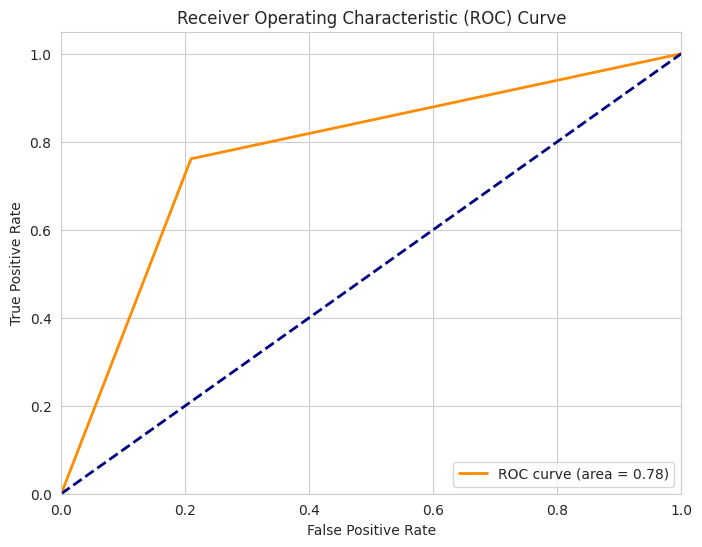

In [ ]:
# Initialize variables to store best k value and corresponding f1-score
best_k = None
best_f1_score = 0

# Initialize lists to store f1-scores and ROC AUC scores for each k
f1_scores = []
roc_auc_scores = []

# Loop through k values from 3 to 21
for k in range(3, 21, 2):
    # Create KNN model with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on resampled training data
    knn.fit(X_train, y_train)

    # Validate the model on validation dataset
    y_pred = knn.predict(X_validate)

    # Calculate f1-score
    f1 = f1_score(y_validate, y_pred)

    # Store f1-score for current k value
    f1_scores.append(f1)

    # Store ROC AUC score for current k value
    roc_auc_scores.append(roc_auc_score(y_validate, y_pred))

    # Check if current f1-score is better than the best f1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k = k

# Print the best k value and corresponding f1-score
print("Best k value:", best_k)
print("Best f1-score:", best_f1_score)

# Create KNN model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the final model on the resampled training data
best_knn.fit(X_train, y_train)

# Test the final model on the test dataset
y_pred_test = best_knn.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



##Naive Bayes


Best params: {'var_smoothing': np.float64(0.008111308307896872)}
Best score: 0.8223744292237443
Validation Performance for Naive Bayes
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        68
           1       0.87      0.88      0.88        84

    accuracy                           0.86       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.86      0.86      0.86       152



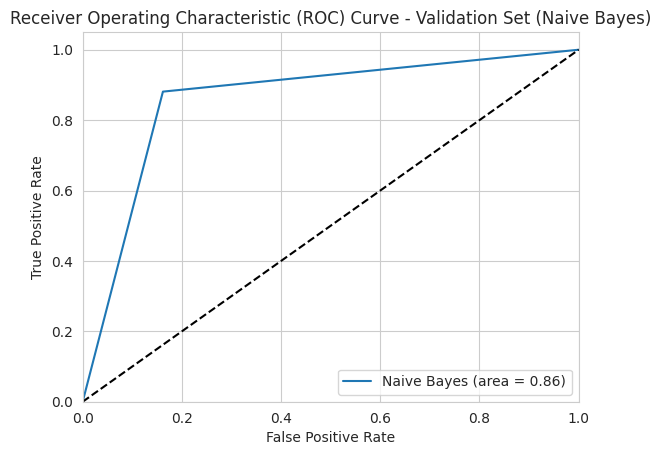

Testing Performance for Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        86
           1       0.73      0.81      0.77        67

    accuracy                           0.78       153
   macro avg       0.78      0.79      0.78       153
weighted avg       0.79      0.78      0.79       153



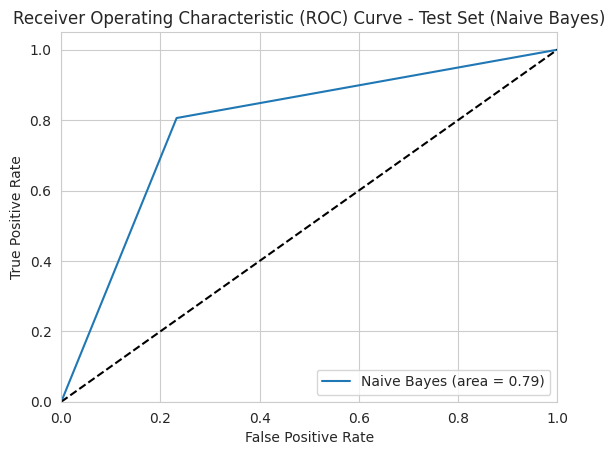

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb = GaussianNB()
grid = GridSearchCV(estimator=gnb, param_grid= param_grid_nb, cv=5, scoring='accuracy') #we won't use scoring='f1_macro' since our class is not imbalanced.
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

best_gnb = grid.best_estimator_
y_pred_validate = best_gnb.predict(X_validate)

# Calculate and print evaluation metrics on validation data for Naive Bayes
print("Validation Performance for Naive Bayes")
print(classification_report(y_validate, y_pred_validate))

# Plot ROC Curve for the validation set for Naive Bayes
fpr_validation_gnb, tpr_validation_nb, _ = roc_curve(y_validate, y_pred_validate)
roc_auc_validation_gnb = roc_auc_score(y_validate, y_pred_validate)
plt.figure()
plt.plot(fpr_validation_gnb, tpr_validation_nb, label=f'Naive Bayes (area = {roc_auc_validation_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set for Naive Bayes
y_pred_test = best_gnb.predict(X_test)

# Calculate and print evaluation metrics on test data for Naive Bayes
print("Testing Performance for Naive Bayes")
print(classification_report(y_test, y_pred_test))

# Plot ROC Curve for the test set for Naive Bayes
fpr_test_gnb, tpr_test_gnb, _ = roc_curve(y_test, y_pred_test)
roc_auc_test_gnb = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test_gnb, tpr_test_gnb, label=f'Naive Bayes (area = {roc_auc_test_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

##DecisionTree

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best CV accuracy: 0.9644953871959743
Validation Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        84

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



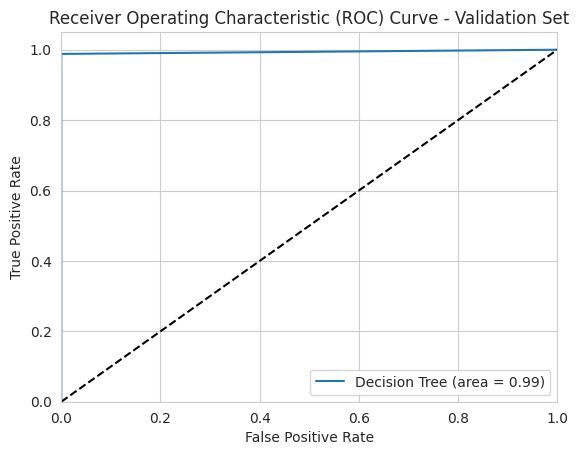

Testing Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        86
           1       1.00      0.99      0.99        67

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



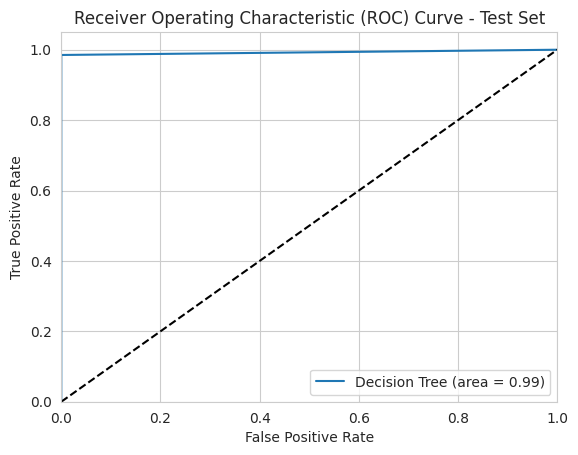

In [ ]:
# Defining the base model using DecisionTreeClassifier.

# Creating a reasonable parameter grid.

# Using GridSearchCV with cross-validation to tune hyperparameters.

# Fitting the model on training data.

# Evaluating the best model on both the validation and test sets.

# Plotting ROC curves and printing classification reports.
# Create base model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Best model
best_dt = grid_search.best_estimator_
y_pred_validation_dt = best_dt.predict(X_validate)

# Calculate and print evaluation metrics on validation data
print("Validation Performance")
print(classification_report(y_validate, y_pred_validation_dt))

# Plot ROC Curve for the validation set
fpr_validation_dt, tpr_validation_dt, _ = roc_curve(y_validate, y_pred_validation_dt)
roc_auc_validation_dt = roc_auc_score(y_validate, y_pred_validation_dt)
plt.figure()
plt.plot(fpr_validation_dt, tpr_validation_dt, label=f'Decision Tree (area = {roc_auc_validation_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

# Finally, evaluate the model on the test set
y_pred_test = best_dt.predict(X_test)

# Calculate and print evaluation metrics on test data
print("Testing Performance")
print(classification_report(y_test, y_pred_test))

# Plot ROC Curve for the test set
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_pred_test)
roc_auc_test_dt = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test_dt, tpr_test_dt, label=f'Decision Tree (area = {roc_auc_test_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

##Logistic Regression

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l2, solver=saga;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, fit_intercept=True, multi_class=auto, penalty=l

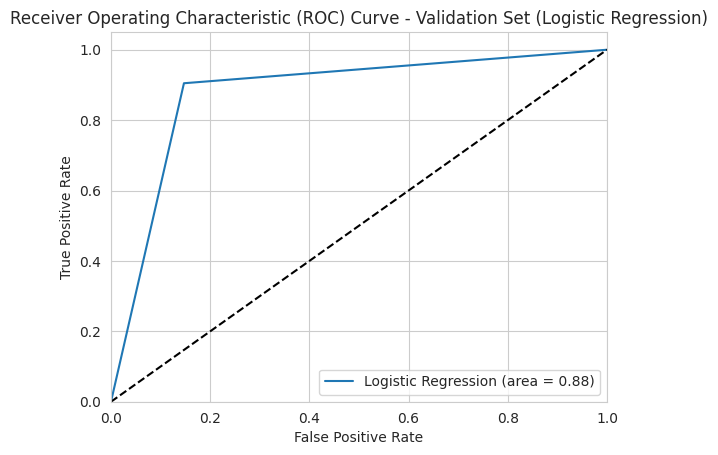

Best Threshold: 0.1, Best F1 Score: 0.8941
Validation Performance for Logistic Regression (Using Best Threshold)
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        68
           1       0.88      0.90      0.89        84

    accuracy                           0.88       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.88      0.88      0.88       152

Testing Performance for Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        86
           1       0.73      0.85      0.79        67

    accuracy                           0.80       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.81      0.80      0.80       153



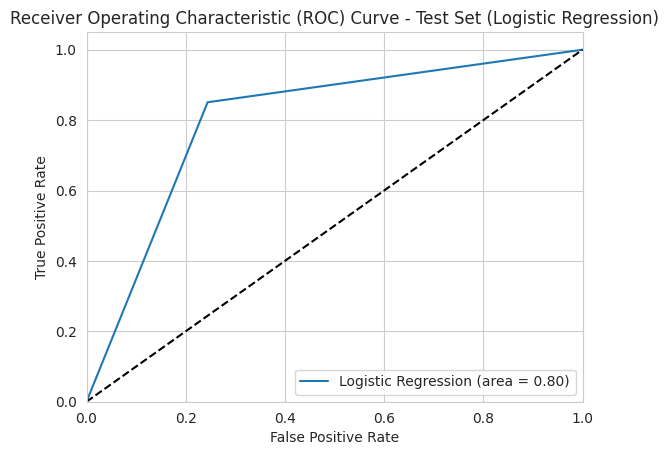

In [ ]:
#Logistic Regression
# Define parameter grid
param_grid_lr = {
    "penalty": ["l2", None],  # 'l2' is standard; None = no regularization
    "solver": ["lbfgs", "saga", "liblinear"],  # widely used + efficient for large datasets
    "C": np.logspace(-3, 3, 10),  # from 0.001 to 1000
    "class_weight": ["balanced", None],
    "fit_intercept": [True],
    "multi_class": ["auto"],  # let it choose
}

# Instantiate and fit
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=5)
grid.fit(X_train, y_train)

# Best model
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

best_lr = grid.best_estimator_
y_pred_validate_lr = best_lr.predict(X_validate)

# Calculate and print evaluation metrics on validation data
print("Validation Performance for Logistic Regression")
print(classification_report(y_validate, y_pred_validate_lr))

# Plot ROC Curve for the validation set
fpr_validate_lr, tpr_validation_lr, _ = roc_curve(y_validate, y_pred_validate_lr)
roc_auc_validate_lr = roc_auc_score(y_validate, y_pred_validate_lr)
plt.figure()
plt.plot(fpr_validate_lr, tpr_validation_lr, label=f'Logistic Regression (area = {roc_auc_validate_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Loop through thresholds to find the one with the highest F1-score
best_f1_score = -1
best_threshold = None
for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred_validate_lr_thresholded = (y_pred_validate_lr > threshold).astype(int)
    f1 = f1_score(y_validate, y_pred_validate_lr_thresholded)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1_score:.4f}")

# Use the best threshold for predictions on the validation set
y_pred_validate_lr_best_threshold = (y_pred_validate_lr > best_threshold).astype(int)

# Calculate and print evaluation metrics on validation data using the best threshold
print("Validation Performance for Logistic Regression (Using Best Threshold)")
print(classification_report(y_validate, y_pred_validate_lr_best_threshold))

# Finally, evaluate the model on the test set
y_pred_test_lr = best_lr.predict(X_test)

# Calculate and print evaluation metrics on test data
print("Testing Performance for Logistic Regression")
print(classification_report(y_test, y_pred_test_lr))

# Plot ROC Curve for the test set
fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_pred_test_lr)
roc_auc_test_lr = roc_auc_score(y_test, y_pred_test_lr)
plt.figure()
plt.plot(fpr_test_lr, tpr_test_lr, label=f'Logistic Regression (area = {roc_auc_test_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

##SVC

###SVC commented because takes way too long

In [ ]:
# #SVC
# # Parameter grid
# param_grid_svc = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.01, 0.001],
#     'degree': [2, 3, 4],  # only used if kernel='poly'
#     'class_weight': [None, 'balanced']
# }

# # Instantiate SVC
# svc = SVC()  # needed if you're using ROC curve or predict_proba

# # Grid search
# grid = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)

# # Best model
# print("Best Parameters:", grid.best_params_)
# print("Best CV Accuracy:", grid.best_score_)

# best_svc = grid.best_estimator_

# # Predict on validation set
# y_pred_val = best_svc.predict(X_validate)

# # Evaluation
# print("Validation Performance (SVC):")
# print(classification_report(y_validate, y_pred_val))

###We use LinearSVC instead

Best Params: {'C': np.float64(1.0), 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}
Best CV Accuracy: 0.8087037554747927
Validation Performance (LinearSVC):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        68
           1       0.89      0.92      0.90        84

    accuracy                           0.89       152
   macro avg       0.89      0.88      0.89       152
weighted avg       0.89      0.89      0.89       152



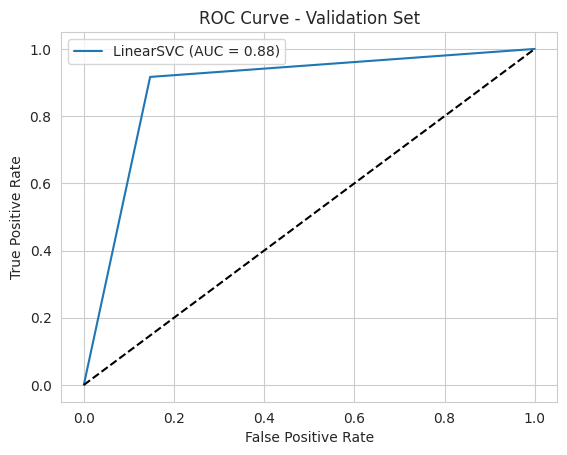

Test Performance (LinearSVC):
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        86
           1       0.73      0.85      0.79        67

    accuracy                           0.80       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.81      0.80      0.80       153



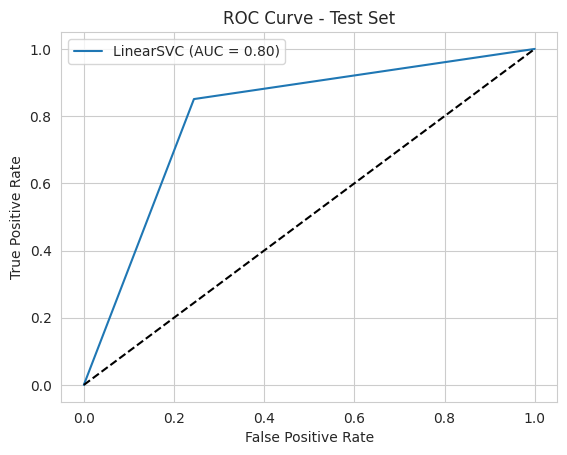

In [ ]:
#We use LinearSVC instead of SVC, because finding the best parameters for SVC takes way too long time
from sklearn.svm import LinearSVC
# Parameter grid
param_grid_linear_svc = {
    'C': np.logspace(-3, 3, 7),  # From 0.001 to 1000
    'penalty': ['l2'],  # Only 'l2' is supported in newer versions
    'loss': ['squared_hinge'],  # Most stable
    'dual': [False],  # Recommended when n_samples > n_features
    'max_iter': [1000, 2000, 3000]
}

# Instantiate model
linear_svc = LinearSVC()

# Set up grid search
grid = GridSearchCV(estimator=linear_svc, param_grid=param_grid_linear_svc, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_linear_svc = grid.best_estimator_

# Predict on validation
y_pred_val = best_linear_svc.predict(X_validate)

print("Validation Performance (LinearSVC):")
print(classification_report(y_validate, y_pred_val))

# ROC Curve (optional but for binary classification only)
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)

plt.figure()
plt.plot(fpr_val, tpr_val, label=f'LinearSVC (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.show()

# Evaluate on Test Set
y_pred_test = best_linear_svc.predict(X_test)
print("Test Performance (LinearSVC):")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_val = roc_auc_score(y_test, y_pred_test)

plt.figure()
plt.plot(fpr_test, tpr_test, label=f'LinearSVC (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

##Random Forest

Best Params: {'bootstrap': True, 'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.9658279750256267
Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



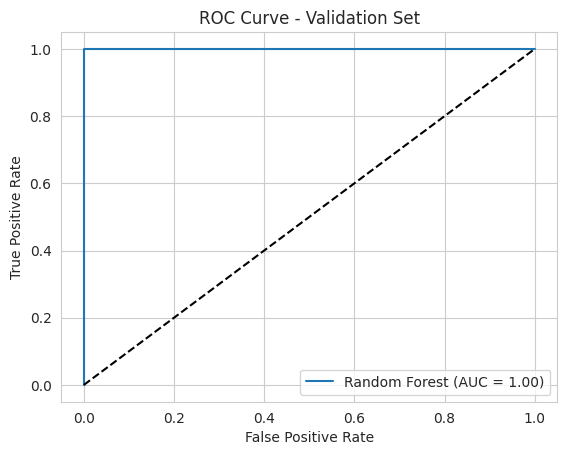

Test Performance (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        67

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



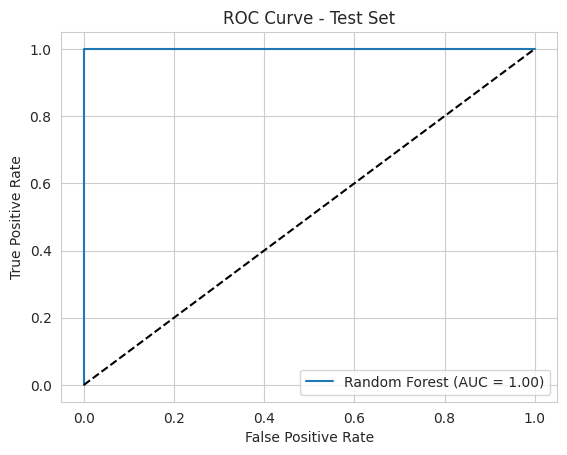

In [ ]:
#Random Forest
from sklearn.model_selection import StratifiedKFold

# Define parameter grid
param_grid_rf = { #These are the best parameters found when manually hyper tuning the parameters, instead of running them all at once which may be computational costly and time-consuming
    'n_estimators': [100], #100
    'max_depth': [None], #None
    'min_samples_split': [2], #2
    'min_samples_leaf': [1], #1
    'max_features': ['sqrt'], #sqrt
    'bootstrap': [True], #True
    'class_weight': [None] #None
}

# Set up Stratified K-Fold cross-validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Set up grid search
grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=stratified_cv, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_rf = grid.best_estimator_

# Predict on validation
y_pred_val = best_rf.predict(X_validate)

print("Validation Performance (Random Forest):")
print(classification_report(y_validate, y_pred_val))

# ROC Curve (for binary classification)
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)

plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Random Forest (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.show()

# Evaluate on test
y_pred_test = best_rf.predict(X_test)
print("Test Performance (Random Forest):")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)


plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Random Forest (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

##Ada Boost

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300}
Best Score: 0.8483459137079489
Validation Performance (Ada Boost):
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.93      0.96      0.95        84

    accuracy                           0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152



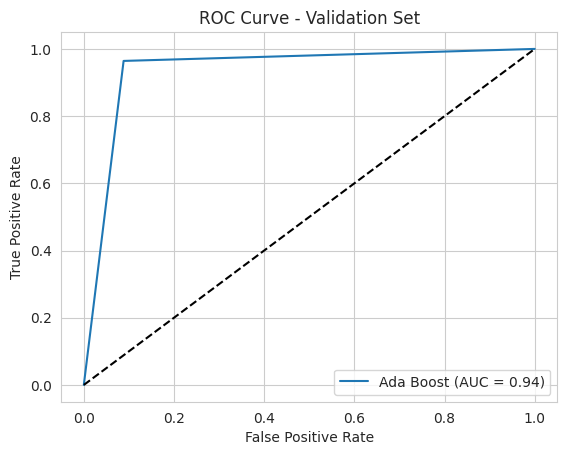

Test Performance (Ada Boost):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        86
           1       0.77      0.82      0.80        67

    accuracy                           0.82       153
   macro avg       0.81      0.82      0.82       153
weighted avg       0.82      0.82      0.82       153



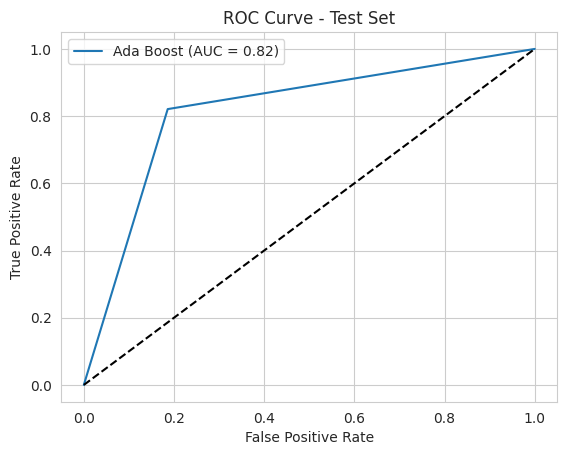

In [ ]:
param_grid_ada = {
    # Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 300}
    'n_estimators': [300],          # Number of weak learners
    'learning_rate': [1.0], # Shrinks the contribution of each classifier
    'algorithm': ['SAMME']             # SAMME.R uses probabilities (default)
}

#Using decision tree with depth control
base_estimator = DecisionTreeClassifier(max_depth=1)  # default is depth-1 (a decision stump)

ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

grid = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
best_ada = grid.best_estimator_

# Predict on validation
y_pred_val = best_ada.predict(X_validate)

print("Validation Performance (Ada Boost):")
print(classification_report(y_validate, y_pred_val))

# ROC Curve (for binary classification)
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)

plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Ada Boost (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.show()

# Evaluate on test
y_pred_test = best_ada.predict(X_test)
print("Test Performance (Ada Boost):")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)


plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Ada Boost (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.show()

##Gradient Boost

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.9521759388686981
Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        84

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



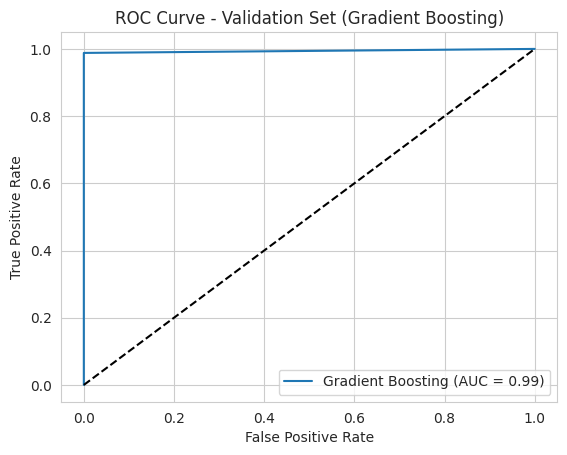

Test Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        86
           1       1.00      0.96      0.98        67

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153



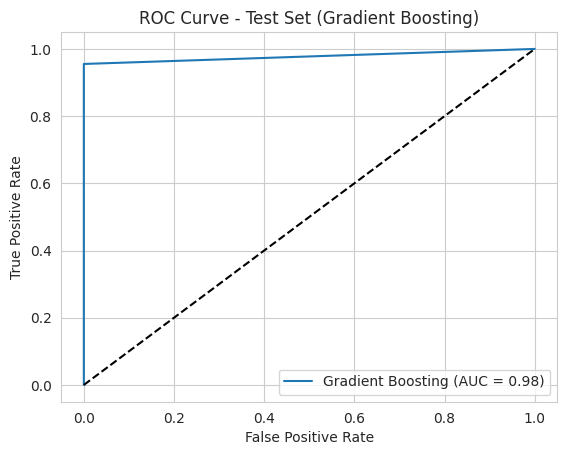

In [ ]:
#Gradient Boost
# Define model
gb = GradientBoostingClassifier(random_state=42)

# Define grid
param_grid_gb = {
    "n_estimators": [300], #300
    "learning_rate": [0.1],
    "max_depth": [3],
    "min_samples_split": [2],
    "min_samples_leaf": [2],
    "subsample": [1.0],
    "max_features": ["sqrt"]
}

# Grid search
grid = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_gb = grid.best_estimator_

# Predict on validation
y_pred_val = best_gb.predict(X_validate)
print("Validation Performance (Gradient Boosting):")
print(classification_report(y_validate, y_pred_val))

# ROC Curve (Validation)
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'Gradient Boosting (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (Gradient Boosting)')
plt.legend()
plt.show()

# Predict on test
y_pred_test = best_gb.predict(X_test)
print("Test Performance (Gradient Boosting):")
print(classification_report(y_test, y_pred_test))

# ROC Curve (Test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Gradient Boosting (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (Gradient Boosting)')
plt.legend()
plt.show()

##Neural Network

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-Validation Score: 0.9726679712981083
Validation Performance (MLP Neural Network Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



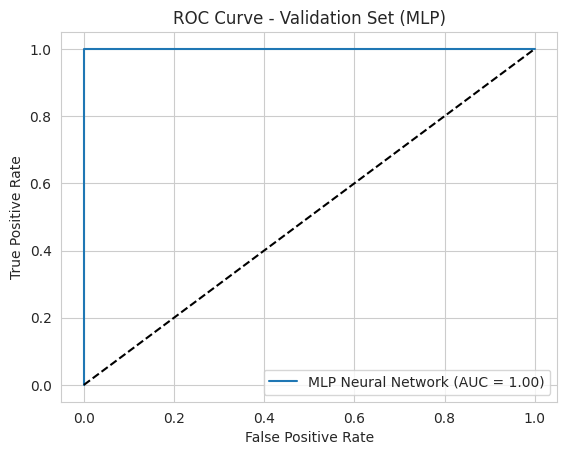

Test Performance (MLP Neural Network Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        67

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153



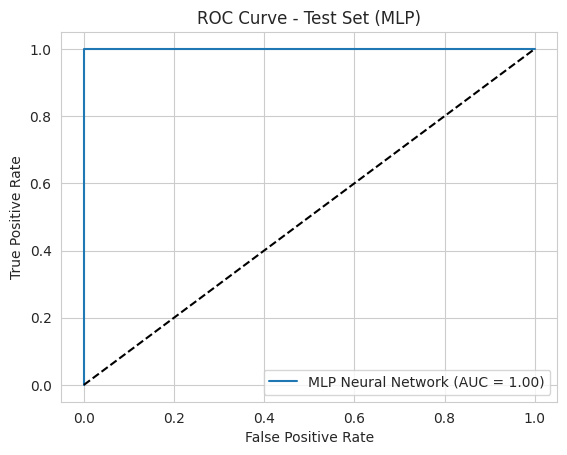

In [ ]:
#Neural Network

# 1. Define the model
mlp = MLPClassifier(random_state=42, max_iter=1000)

# 2. Define the hyperparameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.01],
    'learning_rate': ['constant']
}

# 3. Grid search
grid = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 4. Output results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

best_mlp = grid.best_estimator_

# 5. Validation set prediction
y_pred_val = best_mlp.predict(X_validate)

print("Validation Performance (MLP Neural Network Classifier):")
print(classification_report(y_validate, y_pred_val))

# 6. ROC Curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'MLP Neural Network (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (MLP)')
plt.legend()
plt.show()

# 7. Test Set Evaluation
y_pred_test = best_mlp.predict(X_test)
print("Test Performance (MLP Neural Network Classifier):")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'MLP Neural Network (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (MLP)')
plt.legend()
plt.show()

##XGBoost

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Score: 0.9644487932159166
Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



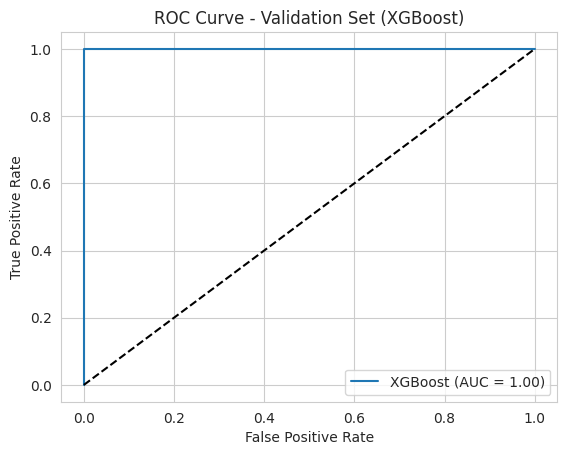

Test Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        86
           1       1.00      0.97      0.98        67

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



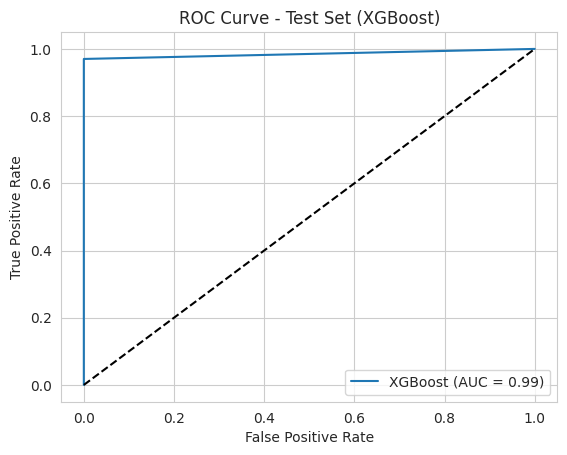

In [ ]:
#XGBoost
# 1. Instantiate a base XGB model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_child_weight': [1],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0],
}

# 3. Run Grid Search
grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# 4. Best parameters
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

best_xgb = grid.best_estimator_

# 5. Evaluate on validation set
y_pred_val = best_xgb.predict(X_validate)

print("Validation Performance (XGBoost):")
print(classification_report(y_validate, y_pred_val))

# 6. ROC Curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_val)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'XGBoost (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (XGBoost)')
plt.legend()
plt.show()

# 7. Test Set Performance
y_pred_test = best_xgb.predict(X_test)
print("Test Performance (XGBoost):")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'XGBoost (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (XGBoost)')
plt.legend()
plt.show()


#Ensembling top 5 models with the best parameters (All with ROCAUC > 0.95)

##VotingClassifier

Classification Report for Validation Performance (VotingClassifier ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

ROC AUC for Voting Ensemble (validate): 1.00


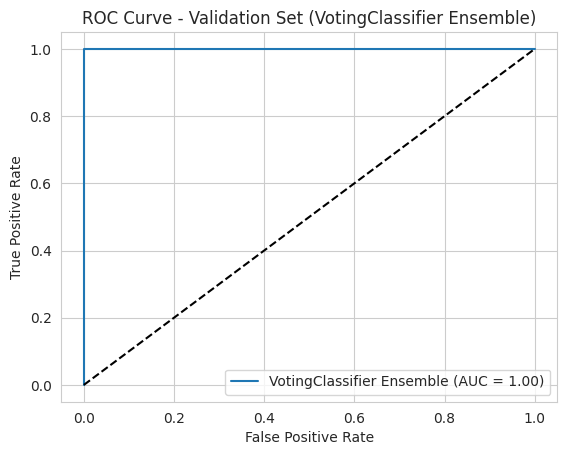

Classification Report for Test Performance (VotingClassifier ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        67

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

ROC AUC for Voting Ensemble (test): 1.00


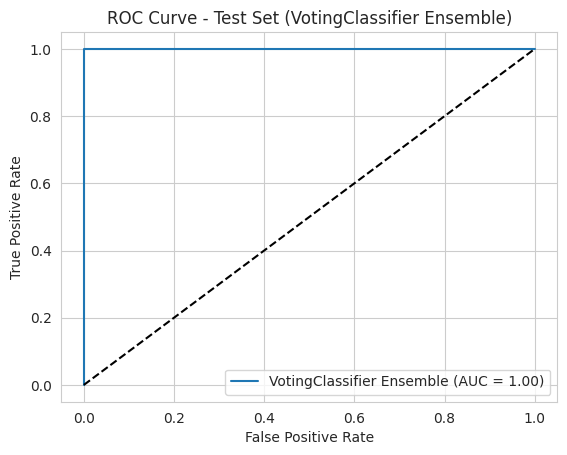

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, splitter='random')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',bootstrap=True, class_weight=None)),
    ('gb', GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0)),
    ('mlp', MLPClassifier(random_state=42, activation='relu', alpha=0.01, hidden_layer_sizes=(50,50), learning_rate='constant', solver='adam')),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1.0))
]

# Create ensemble with soft voting
voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # 'hard' for majority vote
voting_clf.fit(X_train, y_train)

# Evaluate on validate set
y_pred_ensemble_val = voting_clf.predict(X_validate)
print("Classification Report for Validation Performance (VotingClassifier ensemble):")
print(classification_report(y_validate, y_pred_ensemble_val))

# ROC AUC
y_scores_ensemble_val = voting_clf.predict_proba(X_validate)[:, 1]
roc_auc_ensemble = roc_auc_score(y_validate, y_scores_ensemble_val)
print(f"ROC AUC for Voting Ensemble (validate): {roc_auc_ensemble:.2f}")


# 6. ROC Curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_ensemble_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_ensemble_val)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'VotingClassifier Ensemble (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (VotingClassifier Ensemble)')
plt.legend()
plt.show()


# Evaluate on test set
y_pred_ensemble_test = voting_clf.predict(X_test)
print("Classification Report for Test Performance (VotingClassifier ensemble):")
print(classification_report(y_test, y_pred_ensemble_test))

# ROC AUC
y_scores_ensemble_test = voting_clf.predict_proba(X_test)[:, 1]
roc_auc_ensemble = roc_auc_score(y_test, y_scores_ensemble_test)
print(f"ROC AUC for Voting Ensemble (test): {roc_auc_ensemble:.2f}")


# 6. ROC Curve - Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_ensemble_test)
roc_auc_test = roc_auc_score(y_test, y_pred_ensemble_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'VotingClassifier Ensemble (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set (VotingClassifier Ensemble)')
plt.legend()
plt.show()

##StackingClassifier

Classification Report for Validation Performance (StackingClassifier ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        84

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

ROC AUC for Voting Ensemble (validate): 1.00


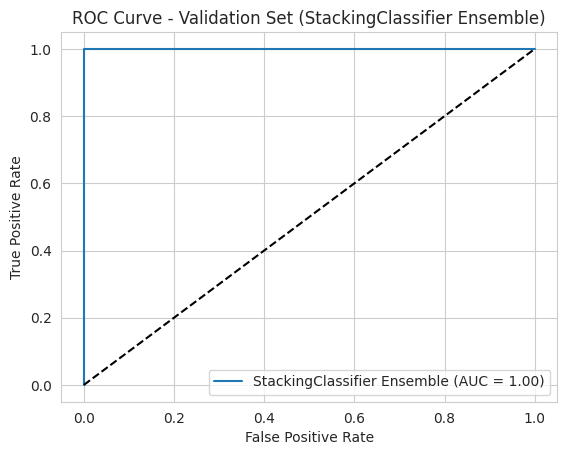

Classification Report for Test Performance (StackingClassifier ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        67

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

ROC AUC for Voting Ensemble (test): 1.00


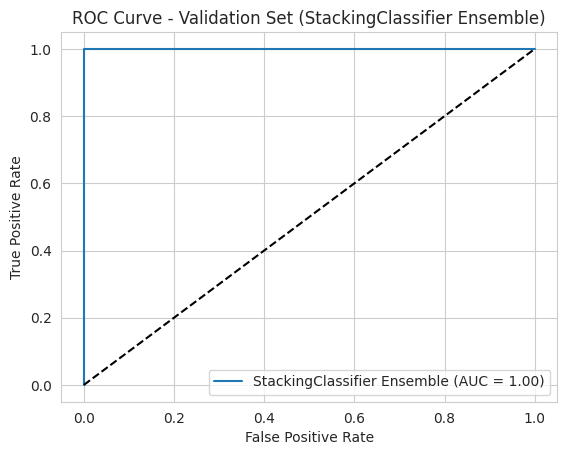

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, splitter='random')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',bootstrap=True, class_weight=None)),
    ('gb', GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0)),
    ('mlp', MLPClassifier(random_state=42, activation='relu', alpha=0.01, hidden_layer_sizes=(50,50), learning_rate='constant', solver='adam')),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1.0))
]

# Create ensemble with StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X_train, y_train)

# Evaluate on validate set
y_pred_ensemble_val = stacking_clf.predict(X_validate)
print("Classification Report for Validation Performance (StackingClassifier ensemble):")
print(classification_report(y_validate, y_pred_ensemble_val))

# ROC AUC
y_scores_ensemble_val = stacking_clf.predict_proba(X_validate)[:, 1]
roc_auc_ensemble = roc_auc_score(y_validate, y_scores_ensemble_val)
print(f"ROC AUC for Voting Ensemble (validate): {roc_auc_ensemble:.2f}")


# 6. ROC Curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_ensemble_val)
roc_auc_val = roc_auc_score(y_validate, y_pred_ensemble_val)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f'StackingClassifier Ensemble (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (StackingClassifier Ensemble)')
plt.legend()
plt.show()

# Evaluate on test set
y_pred_ensemble_test = stacking_clf.predict(X_test)
print("Classification Report for Test Performance (StackingClassifier ensemble):")
print(classification_report(y_test, y_pred_ensemble_test))

# ROC AUC
y_scores_ensemble_test = stacking_clf.predict_proba(X_test)[:, 1]
roc_auc_ensemble = roc_auc_score(y_test, y_scores_ensemble_test)
print(f"ROC AUC for Voting Ensemble (test): {roc_auc_ensemble:.2f}")


# 6. ROC Curve - Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_ensemble_test)
roc_auc_test = roc_auc_score(y_test, y_pred_ensemble_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'StackingClassifier Ensemble (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set (StackingClassifier Ensemble)')
plt.legend()
plt.show()

##Conventional Neural Network


Training with lr=0.001, batch_size=16, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Validation Accuracy: 0.8816
Training with lr=0.001, batch_size=16, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Accuracy: 0.8947
Training with lr=0.001, batch_size=32, epochs=10


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Validation Accuracy: 0.8684
Training with lr=0.001, batch_size=32, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8816
Training with lr=0.01, batch_size=16, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Accuracy: 0.8750
Training with lr=0.01, batch_size=16, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8947
Training with lr=0.01, batch_size=32, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Validation Accuracy: 0.8684
Training with lr=0.01, batch_size=32, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Validation Accuracy: 0.9013

Best Parameters: {'learning_rate': 0.01, 'batch_size': 32, 'epochs': 20}
Best Validation Accuracy: 0.9013157894736842
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        68
           1       0.87      0.96      0.92        84

    accu

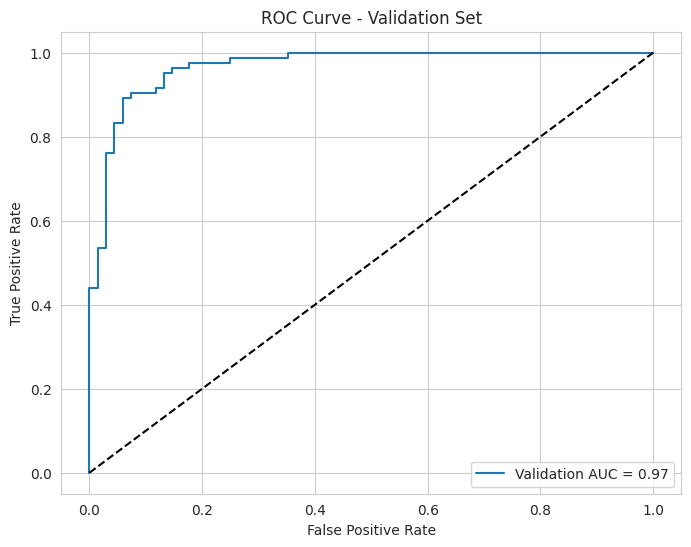

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        86
           1       0.77      0.88      0.82        67

    accuracy                           0.83       153
   macro avg       0.83      0.84      0.83       153
weighted avg       0.84      0.83      0.83       153



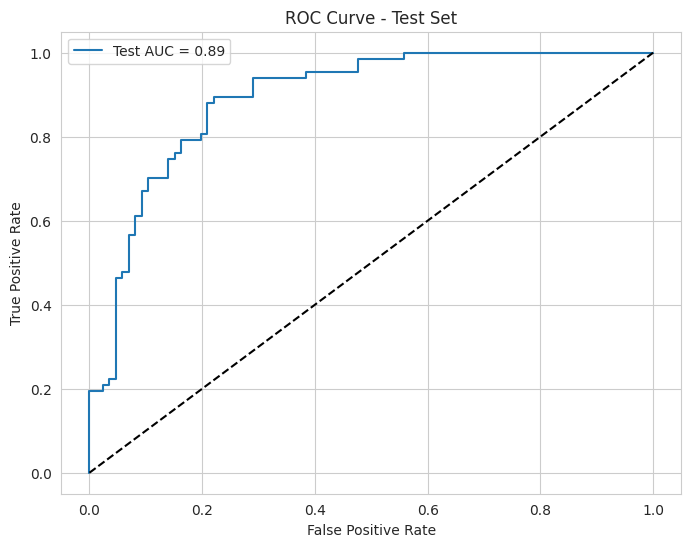

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Model builder
def create_cnn_model(learning_rate=0.001):
    # Changed model architecture to a simple feedforward network
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input shape matches your data
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Manual Grid Search
best_score = 0
best_cnn = None
best_params = {}

for lr in [0.001, 0.01]:
    for batch_size in [16, 32]:
        for epochs in [10,20]:
            print(f"Training with lr={lr}, batch_size={batch_size}, epochs={epochs}")
            model = create_cnn_model(learning_rate=lr)
            model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
            y_val_pred = (model.predict(X_validate) > 0.5).astype("int32")
            acc = accuracy_score(y_validate, y_val_pred)
            print(f"Validation Accuracy: {acc:.4f}")
            if acc > best_score:
                best_score = acc
                best_cnn = model
                best_params = {"learning_rate": lr, "batch_size": batch_size, "epochs": epochs}

print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_score)

from sklearn.model_selection import train_test_split
X_full_train = np.concatenate([X_train, X_validate])
y_full_train = np.concatenate([y_train, y_validate])

# ---- Validation Results ----
y_pred_val_prob = best_cnn.predict(X_validate).flatten()  # Use .predict as equivalent of predict_proba
y_pred_val = (y_pred_val_prob > 0.5).astype(int)

print("Validation Classification Report:")
print(classification_report(y_validate, y_pred_val))

# ROC curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val_prob)
roc_auc_val = roc_auc_score(y_validate, y_pred_val_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.grid(True)
plt.show()

# ---- Test Results ----
y_pred_test_prob = best_cnn.predict(X_test).flatten()
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob)
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()



Training with lr=0.001, batch_size=16, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8816
Training with lr=0.001, batch_size=16, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8882
Training with lr=0.001, batch_size=32, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8816
Training with lr=0.001, batch_size=32, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.8882
Training with lr=0.01, batch_size=16, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.9013
Training with lr=0.01, batch_size=16, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.9145
Training with lr=0.01, batch_size=32, epochs=10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.9013
Training with lr=0.01, batch_size=32, epochs=20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation Accuracy: 0.9145

Best Parameters: {'learning_rate': 0.01, 'batch_size': 16, 'epochs': 20}
Best Valid

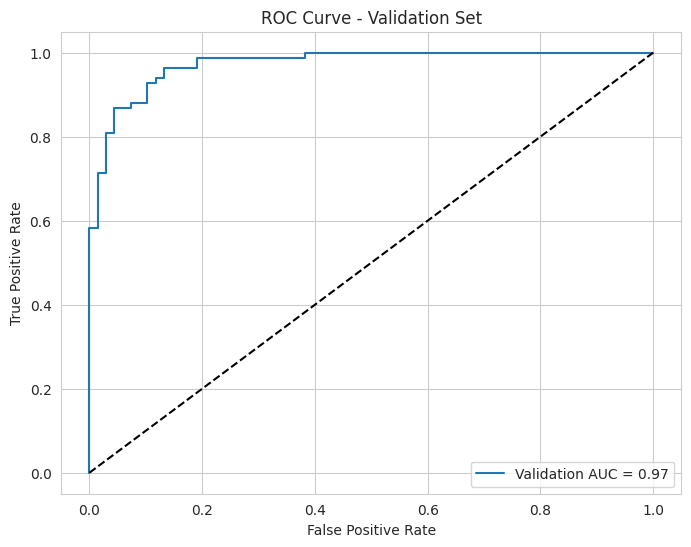

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        86
           1       0.78      0.84      0.81        67

    accuracy                           0.82       153
   macro avg       0.82      0.82      0.82       153
weighted avg       0.83      0.82      0.82       153



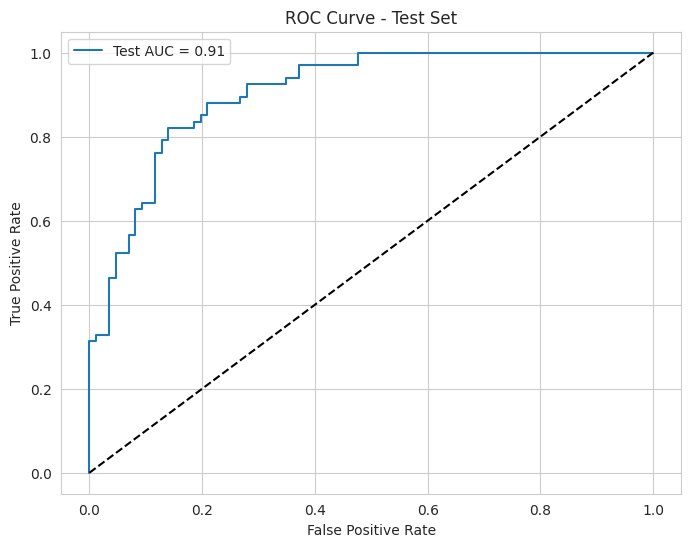

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter

# Model builder
def create_cnn_model(learning_rate=0.001):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Manual Grid Search
best_score = 0
best_cnn = None
best_params = {}

# Grid search for hyperparameters
for lr in [0.001, 0.01]:
    for batch_size in [16, 32]:
        for epochs in [10, 20]:
            print(f"Training with lr={lr}, batch_size={batch_size}, epochs={epochs}")
            cnn = create_cnn_model(learning_rate=lr)  # Assign model to cnn variable
            early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Use early stopping and validation data
            cnn.fit(X_train, y_train, validation_data=(X_validate, y_validate),
                    batch_size=batch_size, epochs=epochs, verbose=0,
                    shuffle=True, callbacks=[early_stop])

            y_val_pred = (cnn.predict(X_validate) > 0.5).astype("int32")  # Use cnn.predict instead of model.predict
            acc = accuracy_score(y_validate, y_val_pred)
            print(f"Validation Accuracy: {acc:.4f}")

            if acc > best_score:
                best_score = acc
                best_cnn = cnn  # Save the best cnn model
                best_params = {"learning_rate": lr, "batch_size": batch_size, "epochs": epochs}

print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_score)

# Combine train and validation sets for retraining on the full data
X_full_train = np.concatenate([X_train, X_validate])
y_full_train = np.concatenate([y_train, y_validate])

# Retrain the model on full training data
final_model = create_cnn_model(learning_rate=best_params['learning_rate'])
final_model.fit(X_full_train, y_full_train, batch_size=best_params['batch_size'],
                epochs=best_params['epochs'], verbose=0, shuffle=True)

# ---- Validation Results ----
y_pred_val_prob = best_cnn.predict(X_validate).flatten()  # Now using cnn.predict
y_pred_val = (y_pred_val_prob > 0.5).astype(int)

print("Validation Classification Report:")
print(classification_report(y_validate, y_pred_val))

# ROC curve - Validation
fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val_prob)
roc_auc_val = roc_auc_score(y_validate, y_pred_val_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {roc_auc_val:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend()
plt.grid(True)
plt.show()

# ---- Test Results ----
y_pred_test_prob = best_cnn.predict(X_test).flatten()  # Now using cnn.predict
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob)
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True)
plt.show()

#Summarize findings

In [ ]:
from sklearn.metrics import precision_score, recall_score
final_output = pd.DataFrame()
final_output["Model"] = None
final_output["Accuracy"] = None
final_output["Recall"] = None
final_output["Precision"] = None
final_output["AUC"] = None
final_output["F1_Score"] = None
final_output["time"] = None

def add_metrics(model , Y_test, Y_pred, final_output, timeElapsed):
  auc = roc_auc_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)
  acc = accuracy_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  new_row = {"Model" : model, "AUC" : auc, "Precision" : precision , "Accuracy" : acc, "F1_Score" : f1, "Recall"  : recall , "time" : timeElapsed }
  print(new_row)
  return new_row

In [ ]:
import time
# Define classifiers
classifiers = {
    'k-NN': KNeighborsClassifier(n_neighbors=11), #Next best k after 1
    'Naive Bayes': GaussianNB(var_smoothing=np.float64(0.008111308307896872)),
    'Decision Tree': DecisionTreeClassifier(random_state=42, splitter='random', min_samples_split=2, min_samples_leaf=1, max_depth=20, criterion='entropy', max_features='sqrt'),
    'Logistic Regression': LogisticRegression(random_state=42, solver='lbfgs', penalty='l2', multi_class='auto', fit_intercept=True, class_weight='balanced', C=np.float64(0.46415888336127775)),
    'Linear SVC': LinearSVC(random_state=42, verbose=35, penalty='l2', loss='squared_hinge', dual=False, C=np.float64(1.0), max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, bootstrap=True, class_weight=None, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100),
    'Ada Boost': AdaBoostClassifier(random_state=42, algorithm='SAMME', learning_rate=1.0, n_estimators=300),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0),
    'Neural Network MLP': MLPClassifier(random_state=42, activation='relu', alpha=0.01, hidden_layer_sizes=(50,50), learning_rate='constant', solver='adam'),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, subsample=1.0)
}

# Loop through classifiers and calculate evaluation metrics on validation and test datasets
for classifier_name, classifier in classifiers.items():
    start_time = time.time()  # Start timing

    # Train the classifier on resampled training data
    classifier.fit(X_train, y_train)

    # Test the classifier on test dataset
    y_pred_test = classifier.predict(X_test)

    end_time = time.time()  # End timing
    execution_time = end_time - start_time
    new_row =  add_metrics(classifier_name, y_test, y_pred_test, final_output, execution_time)
    final_output = pd.concat([final_output, pd.DataFrame([new_row])], ignore_index=True)

{'Model': 'k-NN', 'AUC': np.float64(0.7759458521346754), 'Precision': 0.7391304347826086, 'Accuracy': 0.7777777777777778, 'F1_Score': 0.75, 'Recall': 0.7611940298507462, 'time': 0.013831853866577148}
{'Model': 'Naive Bayes', 'AUC': np.float64(0.7867060048594239), 'Precision': 0.7297297297297297, 'Accuracy': 0.7843137254901961, 'F1_Score': 0.7659574468085106, 'Recall': 0.8059701492537313, 'time': 0.0068662166595458984}
{'Model': 'Decision Tree', 'AUC': np.float64(0.9925373134328358), 'Precision': 1.0, 'Accuracy': 0.9934640522875817, 'F1_Score': 0.9924812030075187, 'Recall': 0.9850746268656716, 'time': 0.0047833919525146484}
{'Model': 'Logistic Regression', 'AUC': np.float64(0.8032801110725443), 'Precision': 0.7307692307692307, 'Accuracy': 0.7973856209150327, 'F1_Score': 0.7862068965517242, 'Recall': 0.8507462686567164, 'time': 0.009341716766357422}
[LibLinear]{'Model': 'Linear SVC', 'AUC': np.float64(0.8032801110725443), 'Precision': 0.7307692307692307, 'Accuracy': 0.7973856209150327, '

In [ ]:
final_output

Model  Accuracy    Recall  Precision       AUC  F1_Score  \
0                 k-NN  0.777778  0.761194   0.739130  0.775946  0.750000   
1          Naive Bayes  0.784314  0.805970   0.729730  0.786706  0.765957   
2        Decision Tree  0.993464  0.985075   1.000000  0.992537  0.992481   
3  Logistic Regression  0.797386  0.850746   0.730769  0.803280  0.786207   
4           Linear SVC  0.797386  0.850746   0.730769  0.803280  0.786207   
5        Random Forest  1.000000  1.000000   1.000000  1.000000  1.000000   
6            Ada Boost  0.816993  0.820896   0.774648  0.817425  0.797101   
7    Gradient Boosting  0.980392  0.955224   1.000000  0.977612  0.977099   
8   Neural Network MLP  0.967320  1.000000   0.930556  0.970930  0.964029   
9              XGBoost  0.986928  0.970149   1.000000  0.985075  0.984848   

       time  
0  0.013832  
1  0.006866  
2  0.004783  
3  0.009342  
4  0.006028  
5  0.211392  
6  0.710689  
7  0.455744  
8  0.701180  
9  0.061463

#Storing the model in a file

In [ ]:
import joblib
joblib.dump(voting_clf, 'voting_classifier_model.joblib')

['voting_classifier_model.joblib']

#After storing the model in a file, load the model to interact with it

In [ ]:
#We assume the model is uploaded to the file structure prepared for interaction
saved_model = joblib.load('/content/voting_classifier_model.joblib')

#Predicting new unseen 10 rows of data with emsembled VotingClassifier

In [ ]:
#Using the stored ensembled VotingClassifier from 'voting_classifier_model.joblib'
Y_pred_new = saved_model.predict(X_new_standardized_data)
print(f"Predictions for Ensembled VotingClassifier: {Y_pred_new}\n")

Predictions for Ensembled VotingClassifier: [0 1 0 0 1 0 1 1 1 1]



In [ ]:
#Predictions for the new unseen data
new_patients['predicted_target'] = Y_pred_new
new_patients

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   49    1   2       120   188    0        1      139      0      2.0      1   
1   54    1   2       120   258    0        0      147      0      0.4      1   
2   57    1   0       165   289    1        0      124      0      1.0      1   
3   57    1   0       110   335    0        1      143      1      3.0      1   
4   49    0   1       134   271    0        1      162      0      0.0      1   
5   69    1   2       140   254    0        0      146      0      2.0      1   
6   45    0   1       130   234    0        0      175      0      0.6      1   
7   44    1   2       120   226    0        1      169      0      0.0      2   
8   35    0   0       138   183    0        1      182      0      1.4      2   
9   65    1   0       120   177    0        1      140      0      0.4      2   

   ca  thal  target  predicted_target  
0   3     3       0                 0  
1   0     3       1                 1  
2   3     3       0                 0  
3   1     3       0                 0  
4   0     2       1                 1  
5   3     3       0                 0  
6   0     2       1                 1  
7   0     2       1                 1  
8   0     2       1                 1  
9   0     3       1                 1

In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from tensorflow.keras.callbacks import EarlyStopping
# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# # Assume you have loaded your data into X and y
# # For demonstration purposes, let's create some dummy data
# np.random.seed(42)
# X = np.random.rand(300, 10)
# y = np.random.randint(0, 2, 300)

# # Split data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# # Standardize numerical features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_validate = scaler.transform(X_validate)
# X_test = scaler.transform(X_test)

# # Model builder with more flexibility
# def create_cnn_model(learning_rate=0.001, dropout_rate=0.5, hidden_units=128):
#     model = Sequential([
#         Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
#         Dropout(dropout_rate),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=learning_rate),
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Manual Grid Search with more hyperparameters and wider ranges
# best_score = 0
# best_cnn = None
# best_params = {}

# # Reduce the range for better performance
# for lr in [0.001, 0.01]:
#     for batch_size in [16, 32]:
#         for epochs in [20, 50]:
#             for dropout in [0.3, 0.5]:
#                 for hidden_units_num in [64, 128]:
#                     print(f"Training with lr={lr}, batch_size={batch_size}, epochs={epochs}, dropout={dropout}, hidden_units={hidden_units_num}")
#                     cnn = create_cnn_model(learning_rate=lr, dropout_rate=dropout, hidden_units=hidden_units_num)
#                     early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#                     cnn.fit(X_train, y_train, validation_data=(X_validate, y_validate),
#                             batch_size=batch_size, epochs=epochs, verbose=0,
#                             shuffle=True, callbacks=[early_stop])

#                     y_val_pred = (cnn.predict(X_validate) > 0.5).astype("int32")
#                     acc = accuracy_score(y_validate, y_val_pred)
#                     print(f"Validation Accuracy: {acc:.4f}")

#                     if acc > best_score:
#                         best_score = acc
#                         best_cnn = cnn
#                         best_params = {"learning_rate": lr, "batch_size": batch_size, "epochs": epochs, "dropout": dropout, "hidden_units": hidden_units_num}

# print("\nBest Parameters:", best_params)
# print("Best Validation Accuracy:", best_score)

# # Combine train and validation sets for retraining on the full data
# X_full_train = np.concatenate([X_train.copy(), X_validate.copy()])
# y_full_train = np.concatenate([y_train.copy(), y_validate.copy()])

# # Retrain the model on full training data with early stopping
# final_model = create_cnn_model(learning_rate=best_params['learning_rate'], dropout_rate=best_params['dropout'], hidden_units=best_params['hidden_units'])
# early_stop_final = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True) # Monitor training loss
# final_model.fit(X_full_train, y_full_train, batch_size=best_params['batch_size'],
#                 epochs=best_params['epochs'], verbose=0, shuffle=True, callbacks=[early_stop_final])

# # ---- Validation Results ----
# y_pred_val_prob = best_cnn.predict(X_validate).flatten()
# y_pred_val = (y_pred_val_prob > 0.5).astype(int)

# print("Validation Classification Report:")
# print(classification_report(y_validate, y_pred_val))

# # ROC curve - Validation
# fpr_val, tpr_val, _ = roc_curve(y_validate, y_pred_val_prob)
# roc_auc_val = roc_auc_score(y_validate, y_pred_val_prob)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_val, tpr_val, label=f'Validation AUC = {roc_auc_val:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Validation Set')
# plt.legend()
# plt.grid(True)
# plt.show()

# # ---- Test Results ----
# y_pred_test_prob = best_cnn.predict(X_test).flatten()
# y_pred_test = (y_pred_test_prob > 0.5).astype(int)

# print("Test Classification Report:")
# print(classification_report(y_test, y_pred_test))

# fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob)
# roc_auc_test = roc_auc_score(y_test, y_pred_test_prob)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Test Set')
# plt.legend()
# plt.grid(True)
# plt.show()
